In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('heart_disease_uci.csv')
print(data.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [3]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [4]:
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table = missing_values(data)
missing_values_table

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
ca,611,66.4
thal,486,52.8
slope,309,33.6
fbs,90,9.8
oldpeak,62,6.7
trestbps,59,6.4
exang,55,6.0
thalch,55,6.0
chol,30,3.3
restecg,2,0.2


<Axes: >

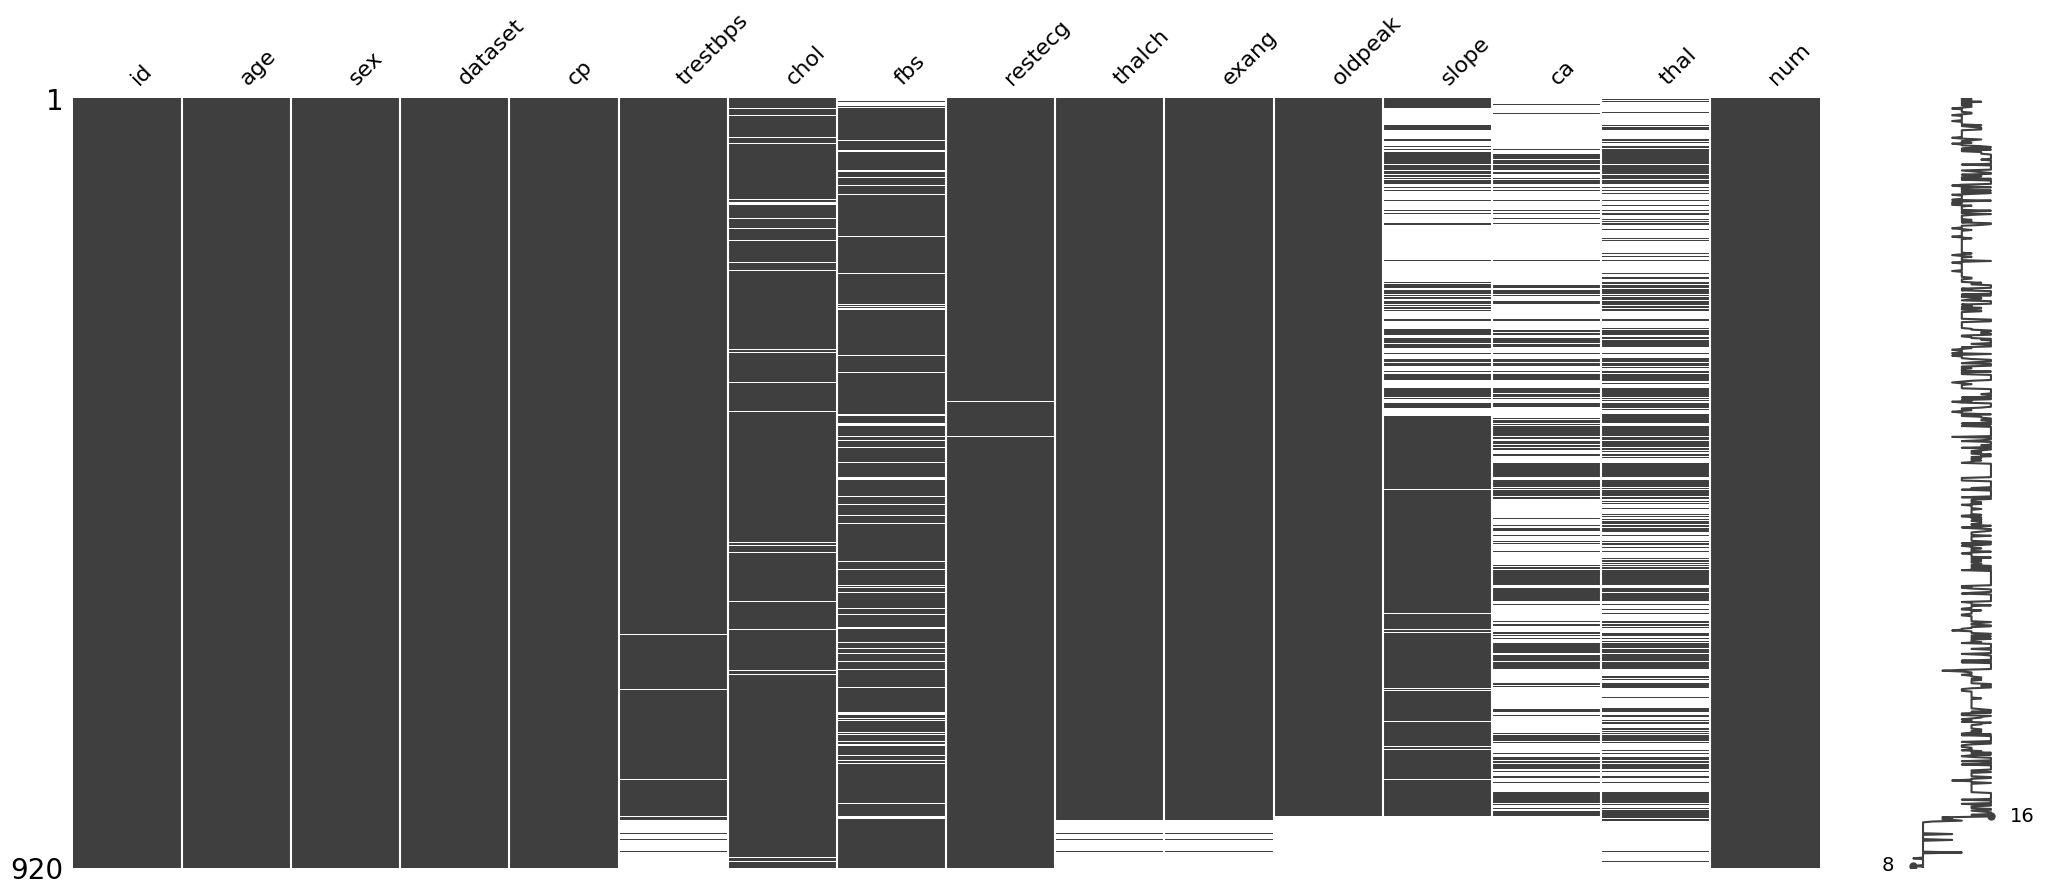

In [5]:
import missingno as msno # For visualizing missing data patterns

# To see how the data correlate with each other;

sorted = data.sort_values('oldpeak')
msno.matrix(sorted)

<Axes: >

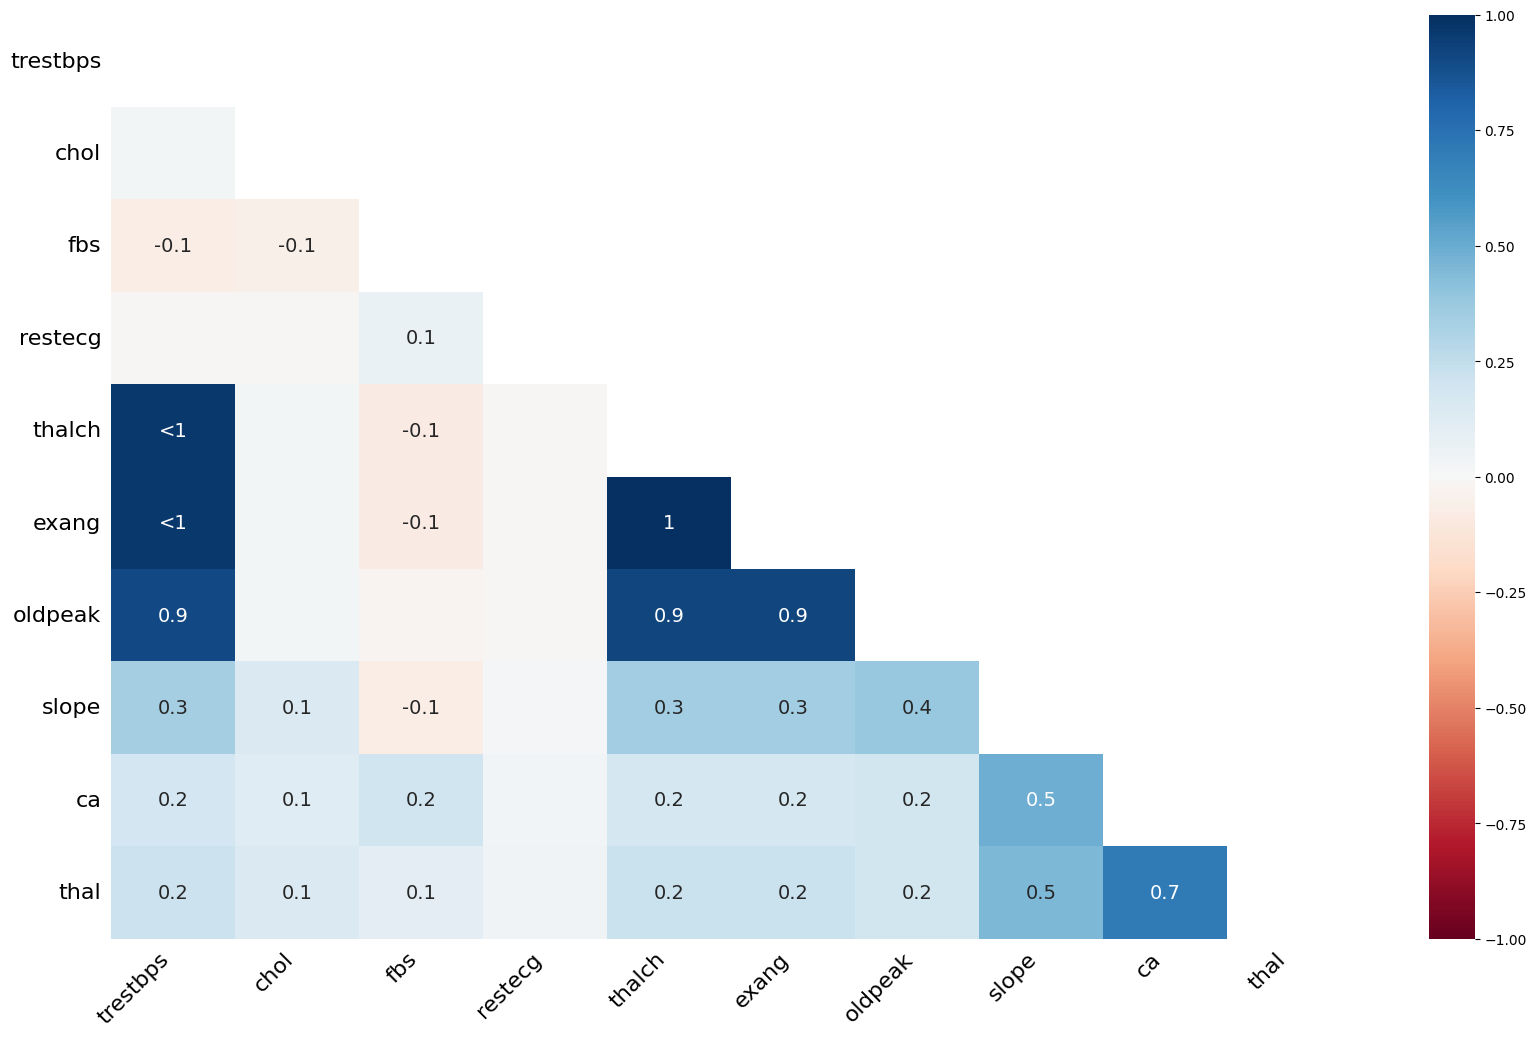

In [6]:
# You can also use a heat map for correlation:

msno.heatmap(data)

<Axes: >

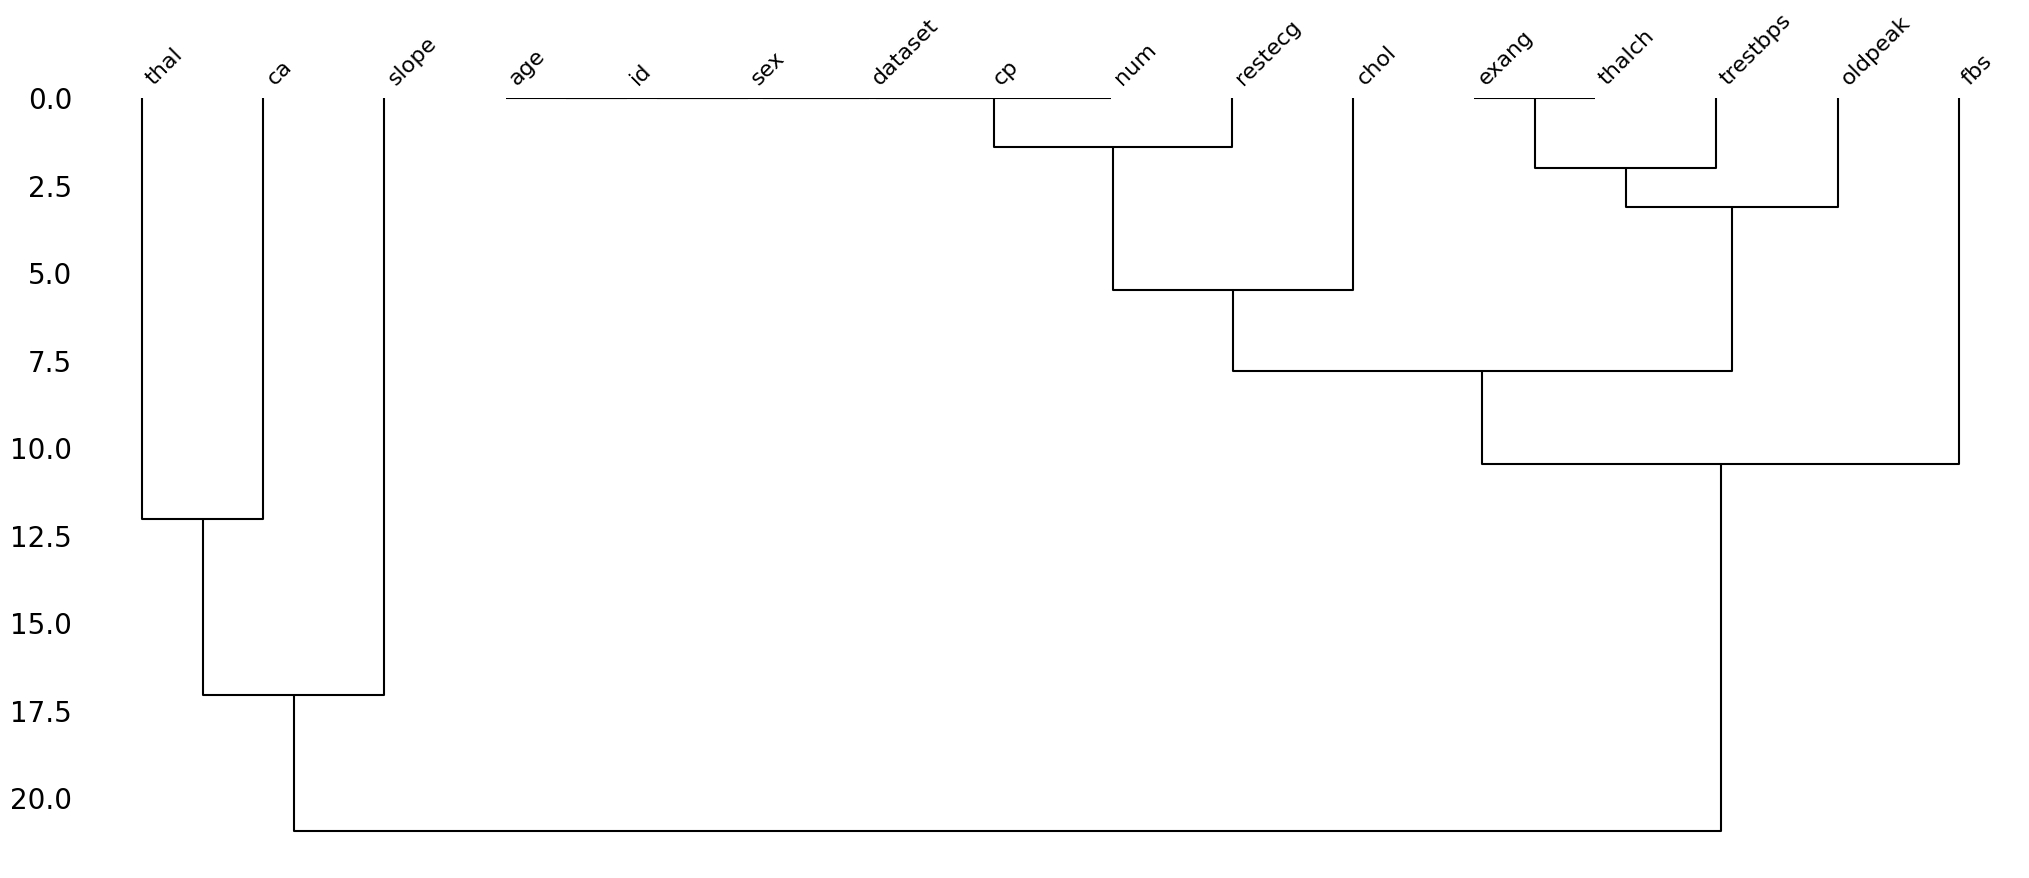

In [7]:
# Another point we can look at in visualization is the dendrogram.

msno.dendrogram(data)

In [8]:
import numpy as np # For linear algebra operations and numerical computations
import pandas as pd # For data analysis and manipulation using data frames
import os

In [9]:
import missingno as msno # For visualizing missing data patterns

from sklearn.preprocessing import LabelEncoder # For converting categorical data to numerical values
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score # For calculating the accuracy score of a classification model
from sklearn.impute import KNNImputer # For imputing missing values using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classification model
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier model
from sklearn.metrics import mean_squared_error # Performance metric for regression models
from sklearn.impute import SimpleImputer # For imputing missing values with a simple strategy

from xgboost import XGBClassifier # XGBoost classification model

In [10]:
def read_data():
    """
    Reads the 'Heart disease' dataset,
    performs some editing, and returns it.
    """
    df = pd.read_csv("heart_disease_uci.csv")
    df['num'] = df['num'].replace({2: 1, 3: 1, 4: 1})
    df = df.drop('id', axis=1)
    df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

    categorical_columns = df.select_dtypes(include=['category']).columns

    # Convert categorical to numerical
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def split_dataset(df):
    """
    Splits the dataset into training and testing sets.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    """
    X = df.drop('num', axis=1)
    y = df['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(f'Size of the Train: {X_train.shape[0]}')
    # print(f'Size of the Test: {X_test.shape[0]}')
    return X_train, X_test, y_train, y_test

def train_model_XGBoost(X_train, X_test, y_train, y_test):
    """
    Trains an XGBoost model on the given training set and evaluates it on the test set.

    Parameters:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.
    """
    # Create and train the XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")
    return accuracy

def train_model_random_forest(X_train, X_test, y_train, y_test):
    """
    Creates and trains a RandomForest model on the given training set
    and evaluates its performance on the test set.

    Parameters:
    - X_train, X_test, y_train, y_test: Training and testing sets for features and labels.

    Returns:
    - accuracy (float): Accuracy score of the trained model on the test set.
    """
    # Create and train the RandomForest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")
    return accuracy

# To compare the success of the methods
accuracies = {}

In [11]:
# Read and preprocess the dataset
df = read_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df)

# Train an XGBoost model on the dataset without handling missing values
accuracy_no_handling = train_model_XGBoost(X_train, X_test, y_train, y_test)

# Store the accuracy of the model without handling missing values in a dictionary
accuracies['No Handling'] = accuracy_no_handling

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Accuracy: 0.8586956521739131


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,NaN,385.0,1,0,NaN,2,NaN,3,NaN,3


In [12]:
# Read and preprocess the dataset
df = read_data()

# 1. Pairwise Deletions
# Drop rows with any missing values (Pairwise Deletions)
df_pairwise = df.dropna()

# Split the dataset (after Pairwise Deletions) into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df_pairwise)

# Train a Random Forest model on the dataset after Pairwise Deletions
accuracy_pairwise = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Pairwise Deletions in a dictionary
accuracies['Pairwise'] = accuracy_pairwise

Accuracy: 0.8387096774193549



In [13]:
# Read and preprocess the dataset
df = read_data()

# 2. Listwise Deletions
# Drop rows with missing values in specific columns
df_listwise = df.dropna(subset=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'])

# Split the dataset (after Listwise Deletions) into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df_listwise)

# Train a Random Forest model on the dataset after Listwise Deletions
accuracy_listwise = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Listwise Deletions in a dictionary
accuracies['Listwise'] = accuracy_listwise

Accuracy: 0.8709677419354839



In [14]:
# Read and preprocess the dataset
df = read_data()

# 3. Dropping Entire Columns
# Drop entire columns with any missing values
df_dropping_entire_columns = df.dropna(axis=1)

# Split the dataset (after Dropping Entire Columns) into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(df_dropping_entire_columns)

# Train a Random Forest model on the dataset after Dropping Entire Columns
accuracy_dropping_entire_columns = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model after Dropping Entire Columns in a dictionary
accuracies['Dropping Entire Columns'] = accuracy_dropping_entire_columns

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['restecg']==0) & (X_train['exang']==2)]

Accuracy: 0.8260869565217391


------------------


After Imputation: 



,age,sex,dataset,cp,fbs,restecg,exang,slope,thal
918,58,1,3,0,1,0,2,3,3


In [15]:
def impute_and_train(X_train, y_train, X_test, y_test, strategy):
    """
    Imputes missing values in the training and testing sets using the specified strategy,
    trains a Random Forest model, and evaluates its performance on the test set.

    Parameters:
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    - strategy (str): Imputation strategy to handle missing values ('mean' or 'median').

    Returns:
    - accuracy (float): Accuracy score of the model on the test set.
    """
    # Impute missing values
    imputer = SimpleImputer(strategy=strategy)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    # Train a Random Forest model on the imputed training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_imputed, y_train)

    # Evaluate the model on the imputed test set
    y_pred = rf_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n\nImputation strategy: {strategy}")
    print(f"Accuracy: {accuracy}\n")
    return accuracy, X_train_imputed

# Read and preprocess the dataset
df = read_data()
X_train, X_test, y_train, y_test = split_dataset(df)

# Train the model using different imputation strategies
strategies = ['mean', 'median']

for strategy in strategies:
    accuracy, X_train_imputed = impute_and_train(X_train, y_train, X_test, y_test, strategy)
    accuracies[strategy] = accuracy

    # A specific data, after the procedure
    print("\n------------------\n")
    print("\nAfter Imputation: \n")
    print(X_train_imputed[(X_train_imputed['age']==58.0) & (X_train_imputed['sex']==1.0) & (X_train_imputed['dataset']==3.0) & (X_train_imputed['chol']==385)])
    print("\n----------------------------\n----------------------------\n----------------------------")



Imputation strategy: mean
Accuracy: 0.842391304347826


------------------


After Imputation: 

     age  sex  dataset   cp    trestbps   chol  fbs  restecg      thalch  \
16  58.0  1.0      3.0  0.0  131.668596  385.0  1.0      0.0  137.383285   

    exang   oldpeak  slope     ca  thal  
16    2.0  0.881187    3.0  0.688   3.0  

----------------------------
----------------------------
----------------------------


Imputation strategy: median
Accuracy: 0.8369565217391305


------------------


After Imputation: 

     age  sex  dataset   cp  trestbps   chol  fbs  restecg  thalch  exang  \
16  58.0  1.0      3.0  0.0     130.0  385.0  1.0      0.0   140.0    2.0   

    oldpeak  slope   ca  thal  
16      0.5    3.0  0.0   3.0  

----------------------------
----------------------------
----------------------------


In [16]:
def constant_imputer(X_train, y_train, X_test, y_test):
    """
    Imputes missing values with a constant value (999) in the training and testing sets,
    trains a Random Forest model, and evaluates its performance on the test set.

    Parameters:
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.

    Returns:
    - accuracy (float): Accuracy score of the model on the test set.
    """
    # Impute missing values with a constant value (999)
    imputer = SimpleImputer(strategy='constant', fill_value=999)
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    # Train a Random Forest model on the imputed training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_imputed, y_train)

    # Evaluate the model on the imputed test set
    y_pred = rf_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy}\n")
    return accuracy, X_train_imputed

# Read and preprocess the dataset
df = read_data()
X_train, X_test, y_train, y_test = split_dataset(df)

# Impute missing values with a constant value and train the model
accuracy_constant, X_train_imputed = constant_imputer(X_train, y_train, X_test, y_test)

# Store the accuracy of the model with constant imputation in a dictionary
accuracies['Constant Impute'] = accuracy_constant

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")

X_train_imputed[(X_train_imputed['age']==58.0) & (X_train_imputed['sex']==1.0) & (X_train_imputed['dataset']==3.0) & (X_train_imputed['chol']==385)]


Accuracy: 0.8369565217391305


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
16,58.0,1.0,3.0,0.0,999.0,385.0,1.0,0.0,999.0,2.0,999.0,3.0,999.0,3.0


In [17]:
def fill_missing_values(data, method='ffill'):
    """
    Fills missing values in the dataset using specified methods: 'ffill', 'bfill', or 'linear'.

    Parameters:
    - data (pd.DataFrame): Input dataset.
    - method (str): Method for filling missing values ('ffill', 'bfill', or 'linear').

    Returns:
    - filled_data (pd.DataFrame): Dataset with filled missing values.
    """
    if method == 'ffill':
        filled_data = data.fillna(method='ffill')
    elif method == 'bfill':
        data['ca'] = data['ca'].fillna(data['ca'].mean())
        filled_data = data.fillna(method='bfill')
    else:
        filled_data = data.interpolate(method='linear', limit_direction='forward')
    return filled_data

# Read and preprocess the dataset
data = read_data()

# Fill missing values using forward fill method
filled_data_ffill = fill_missing_values(data, method='ffill')
X_train_ffill, X_test_ffill, y_train_ffill, y_test_ffill = split_dataset(filled_data_ffill)

# Fill missing values using back fill method
filled_data_bfill = fill_missing_values(data, method='bfill')
X_train_bfill, X_test_bfill, y_train_bfill, y_test_bfill = split_dataset(filled_data_bfill)

# Fill missing values using linear interpolation method
filled_data_linear = fill_missing_values(data, method='linear')
X_train_linear, X_test_linear, y_train_linear, y_test_linear = split_dataset(filled_data_linear)

# A specific data, after the procedure
# Train Random Forest models on datasets with different filling methods
print("\n\n\nFfill method:")
accuracy_ffill = train_model_random_forest(X_train_ffill, X_test_ffill, y_train_ffill, y_test_ffill)
print("\n------------------\n")
print("\nAfter Imputation: \n")
print(X_train_ffill[(X_train_ffill['age']==58.0) & (X_train_ffill['sex']==1.0) & (X_train_ffill['dataset']==3.0) & (X_train_ffill['chol']==385)]
)
print("\n----------------------------\n----------------------------\n----------------------------")

print("\n\n\nBfill method:")
accuracy_bfill = train_model_random_forest(X_train_bfill, X_test_bfill, y_train_bfill, y_test_bfill)
print("\n------------------\n")
print("\nAfter Imputation: \n")
print(X_train_bfill[(X_train_bfill['age']==58.0) & (X_train_bfill['sex']==1.0) & (X_train_bfill['dataset']==3.0) & (X_train_bfill['chol']==385)]
)
print("\n----------------------------\n----------------------------\n----------------------------")

print("\n\n\nLinear method:")
accuracy_linear = train_model_random_forest(X_train_linear, X_test_linear, y_train_linear, y_test_linear)
print("\n------------------\n")
print("\nAfter Imputation: \n")
print(X_train_linear[(X_train_linear['age']==58.0) & (X_train_linear['sex']==1.0) & (X_train_linear['dataset']==3.0) & (X_train_linear['chol']==385)]
)
print("\n----------------------------\n----------------------------\n----------------------------")

# Store accuracies in a dictionary for comparison
accuracies['Ffill'] = accuracy_ffill
accuracies['Bfill'] = accuracy_bfill
accuracies['Linear'] = accuracy_linear




Ffill method:


/tmp/ipython-input-17-2657693665.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = data.fillna(method='ffill')
/tmp/ipython-input-17-2657693665.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = data.fillna(method='bfill')


Accuracy: 0.8532608695652174


------------------


After Imputation: 

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
918   58    1        3   0     122.0  385.0    1        0   100.0      2   

     oldpeak  slope   ca  thal  
918      0.0      3  0.0     3  

----------------------------
----------------------------
----------------------------



Bfill method:
Accuracy: 0.8315217391304348


------------------


After Imputation: 

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
918   58    1        3   0     120.0  385.0    1        0    93.0      2   

     oldpeak  slope        ca  thal  
918      0.0      3  0.676375     3  

----------------------------
----------------------------
----------------------------



Linear method:
Accuracy: 0.8315217391304348


------------------


After Imputation: 

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
918   58    1        3   0     121.0  385.0    1 

In [18]:
def knn_impute(X_train, X_test, y_train, y_test, k=5):
    """
    Imputes missing values using the K-Nearest Neighbors (KNN) algorithm.

    Parameters:
    - X_train: pandas DataFrame, training dataset
    - X_test: pandas DataFrame, testing dataset
    - y_train: pandas Series, training labels
    - y_test: pandas Series, testing labels
    - k: int, number of neighbors for KNN imputation

    Returns:
    - X_train_imputed, X_test_imputed, y_train, y_test: pandas DataFrames and Series,
      imputed training and testing datasets along with labels
    """
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
    return X_train_imputed, X_test_imputed, y_train, y_test

# Read and preprocess the dataset
df = read_data()
X_train, X_test, y_train, y_test = split_dataset(df)

# Impute missing values using KNN
X_train_imputed, X_test_imputed, y_train, y_test = knn_impute(X_train, X_test, y_train, y_test, k=10)

# Train a Random Forest model on the imputed dataset
accuracy_knn = train_model_random_forest(X_train_imputed, X_test_imputed, y_train, y_test)

# Store the accuracy of the model with KNN imputation in a dictionary
accuracies['KNN'] = accuracy_knn

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train_imputed[(X_train_imputed['age']==58.0) & (X_train_imputed['sex']==1.0) & (X_train_imputed['dataset']==3.0) & (X_train_imputed['chol']==385)]

Accuracy: 0.8478260869565217


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
16,58.0,1.0,3.0,0.0,141.4,385.0,1.0,0.0,125.6,2.0,0.45,3.0,0.7,3.0


In [19]:
def linear_regression_impute(df, target_column, feature_columns):
    """
    Imputes missing values using linear regression.

    Parameters:
    - df: pandas DataFrame, input dataset
    - target_column: str, target column with missing values to be imputed
    - feature_columns: list, feature columns used to predict missing values

    Returns:
    - pd.DataFrame, dataset with imputed missing values
    """
    # Separate missing and non-missing values
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values using the model
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values

    return df_filled

# Impute missing values using linear regression
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

linear_data = read_data()

for target_column in target_columns_to_impute:
    linear_data = linear_regression_impute(linear_data, target_column, feature_columns_for_imputation)

# Split the dataset after linear regression imputation
X_train, X_test, y_train, y_test = split_dataset(linear_data)

# Train a Random Forest model on the imputed dataset
accuracy_linear_reg = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model with linear regression imputation in a dictionary
accuracies['Linear Regression'] = accuracy_linear_reg

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Accuracy: 0.8206521739130435


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,143.469093,385.0,1,0,104.142288,2,0.712014,3,0.757839,3


In [20]:
def random_forest_impute(df, target_column, feature_columns):
    """
    Imputes missing values using Random Forest.

    Parameters:
    - df: pandas DataFrame, input dataset
    - target_column: str, target column with missing values to be imputed
    - feature_columns: list, feature columns used to predict missing values

    Returns:
    - pd.DataFrame, dataset with imputed missing values
    """
    # Separate missing and non-missing values
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Create training and test sets for the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Create a Random Forest regression model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values using the model
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    # Create a dataset with imputed missing values
    df_filled = df.copy()
    df_filled.loc[df[target_column].isnull(), target_column] = predicted_values

    return df_filled

# Impute missing values using Random Forest
target_columns_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
feature_columns_for_imputation = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

random_data = read_data()

for target_column in target_columns_to_impute:
    random_data = random_forest_impute(random_data, target_column, feature_columns_for_imputation)

# Split the dataset after Random Forest imputation
X_train, X_test, y_train, y_test = split_dataset(random_data)

# Train a Random Forest model on the imputed dataset
accuracy_random_forest = train_model_random_forest(X_train, X_test, y_train, y_test)

# Store the accuracy of the model with Random Forest imputation in a dictionary
accuracies['Random Forest'] = accuracy_random_forest

# A specific data, after the procedure
print("\n------------------\n")
print("\nAfter Imputation: \n")
X_train[(X_train['age']==58.0) & (X_train['sex']==1.0) & (X_train['dataset']==3.0) & (X_train['chol']==385)]

Accuracy: 0.8369565217391305


------------------


After Imputation: 



,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
918,58,1,3,0,158.763333,385.0,1,0,114.42,2,0.892,3,1.285667,3


In [21]:
# Translate Dictionary to DataFrame
df = pd.DataFrame(list(accuracies.items()), columns=['Method', 'Accuracy'])

# Formatting
df['Accuracy'] = df['Accuracy'].apply(lambda x: round(x, 3))
df

,Method,Accuracy
0,No Handling,0.859
1,Pairwise,0.839
2,Listwise,0.871
3,Dropping Entire Columns,0.826
4,mean,0.842
5,median,0.837
6,Constant Impute,0.837
7,Ffill,0.853
8,Bfill,0.832
9,Linear,0.832


In [22]:
# Check for missing values
missing_data = data.isnull().sum()
print(f"Missing Values: {missing_data[missing_data > 0]}")

Missing Values: trestbps    59
chol        30
thalch      55
oldpeak     62
dtype: int64


In [23]:
# Imputasi dengan median
data['trestbps'] = data['trestbps'].fillna(data['trestbps'].median())
data['chol'] = data['chol'].fillna(data['chol'].median())
data['thalch'] = data['thalch'].fillna(data['thalch'].median())
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

In [24]:
from sklearn.impute import KNNImputer

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)  # Menentukan jumlah tetangga yang digunakan
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [25]:
# Imputasi untuk kolom kategorikal
data['fbs'] = data['fbs'].fillna(data['fbs'].mode()[0])
data['restecg'] = data['restecg'].fillna(data['restecg'].mode()[0])

In [26]:
# Hapus kolom dengan banyak missing values
data = data.drop(columns=['ca', 'thal'])

In [27]:
# Check for missing values
missing_data = data.isnull().sum()
print(f"Missing Values: {missing_data[missing_data > 0]}")

Missing Values: Series([], dtype: int64)


In [28]:
# Check a few rows to ensure imputation was done correctly
print(data.head())

   age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope  num  
0      2.3      0    0  
1      1.5      1    1  
2      2.6      1    1  
3      3.5      0    0  
4      1.4      2    0  


<Axes: >

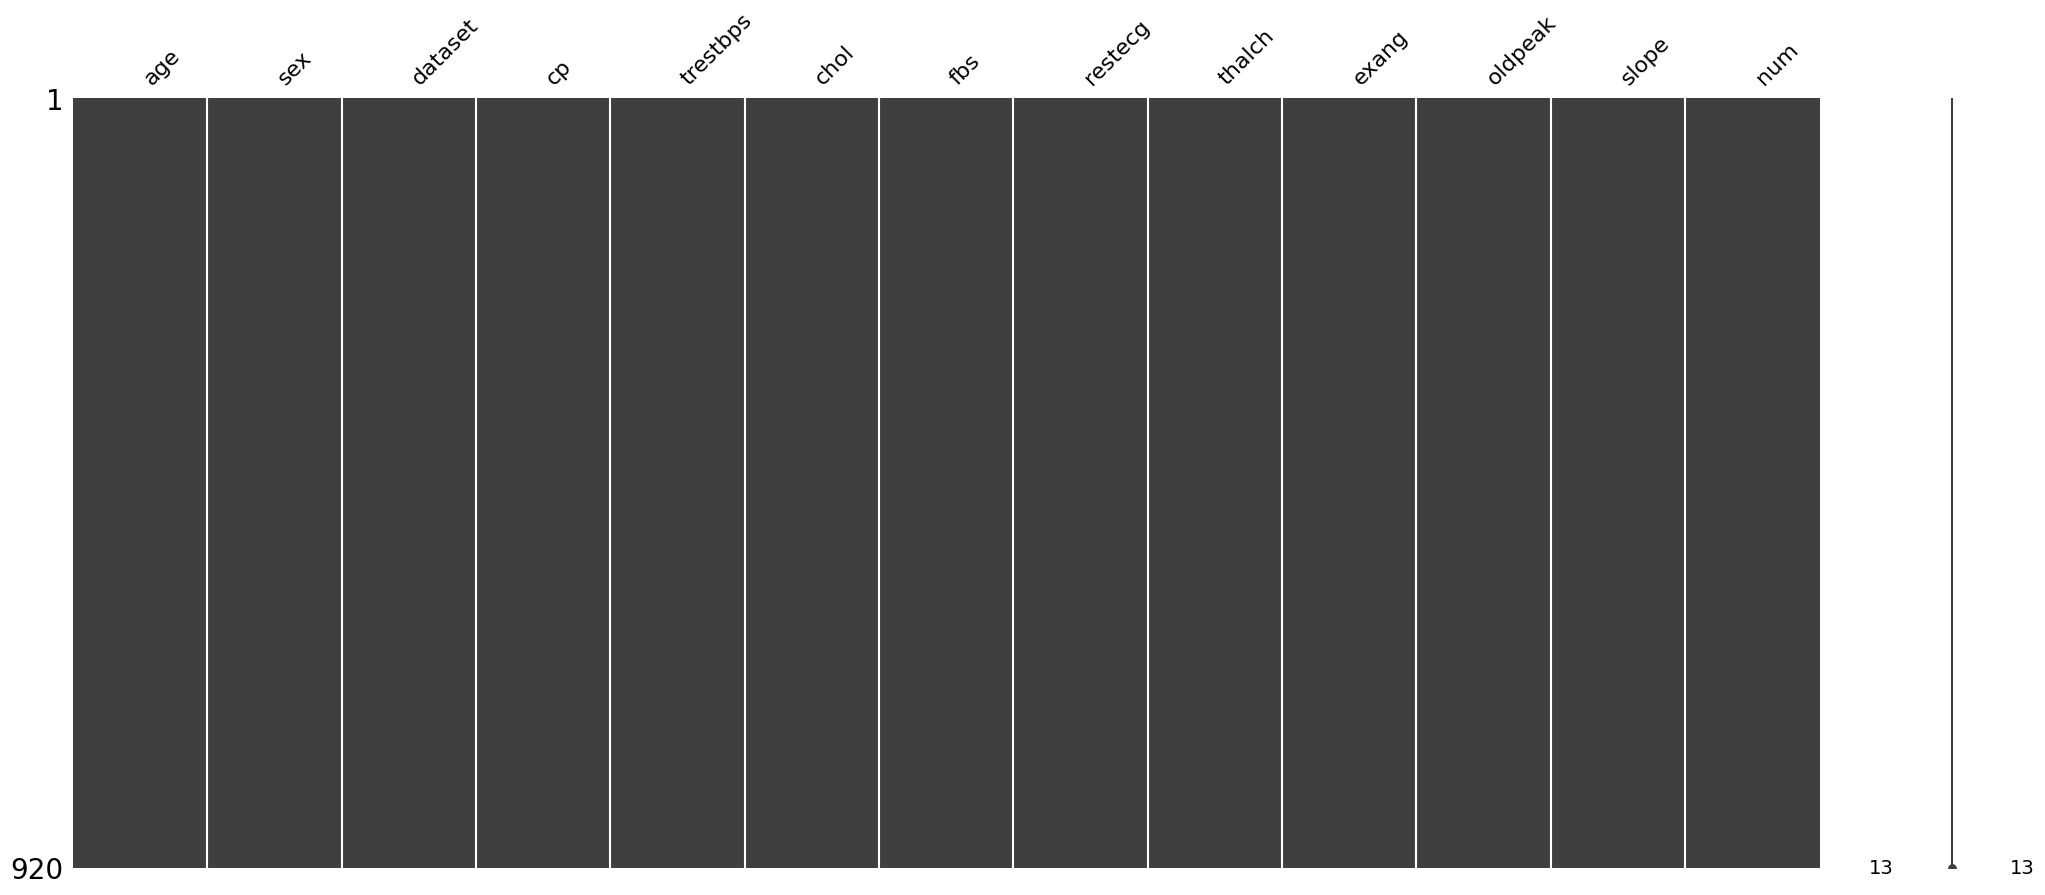

In [29]:
import missingno as msno
msno.matrix(data)  # Visualizes the missing data patterns

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

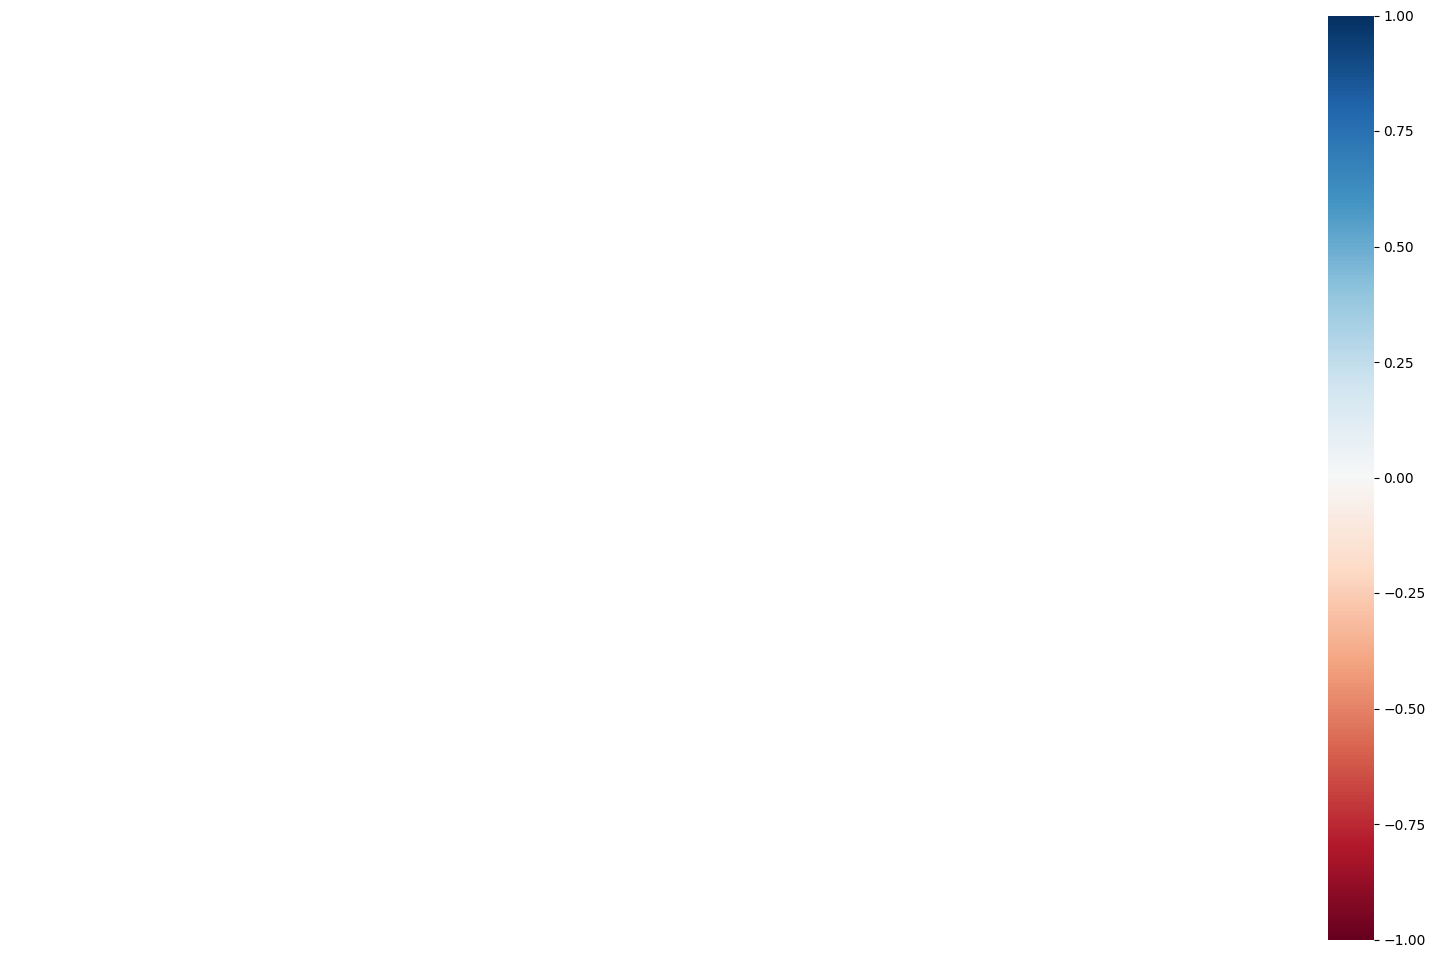

In [30]:
# You can also use a heatmap to see the missing data correlation:
msno.heatmap(data)

/usr/local/lib/python3.11/dist-packages/scipy/cluster/hierarchy.py:2823: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

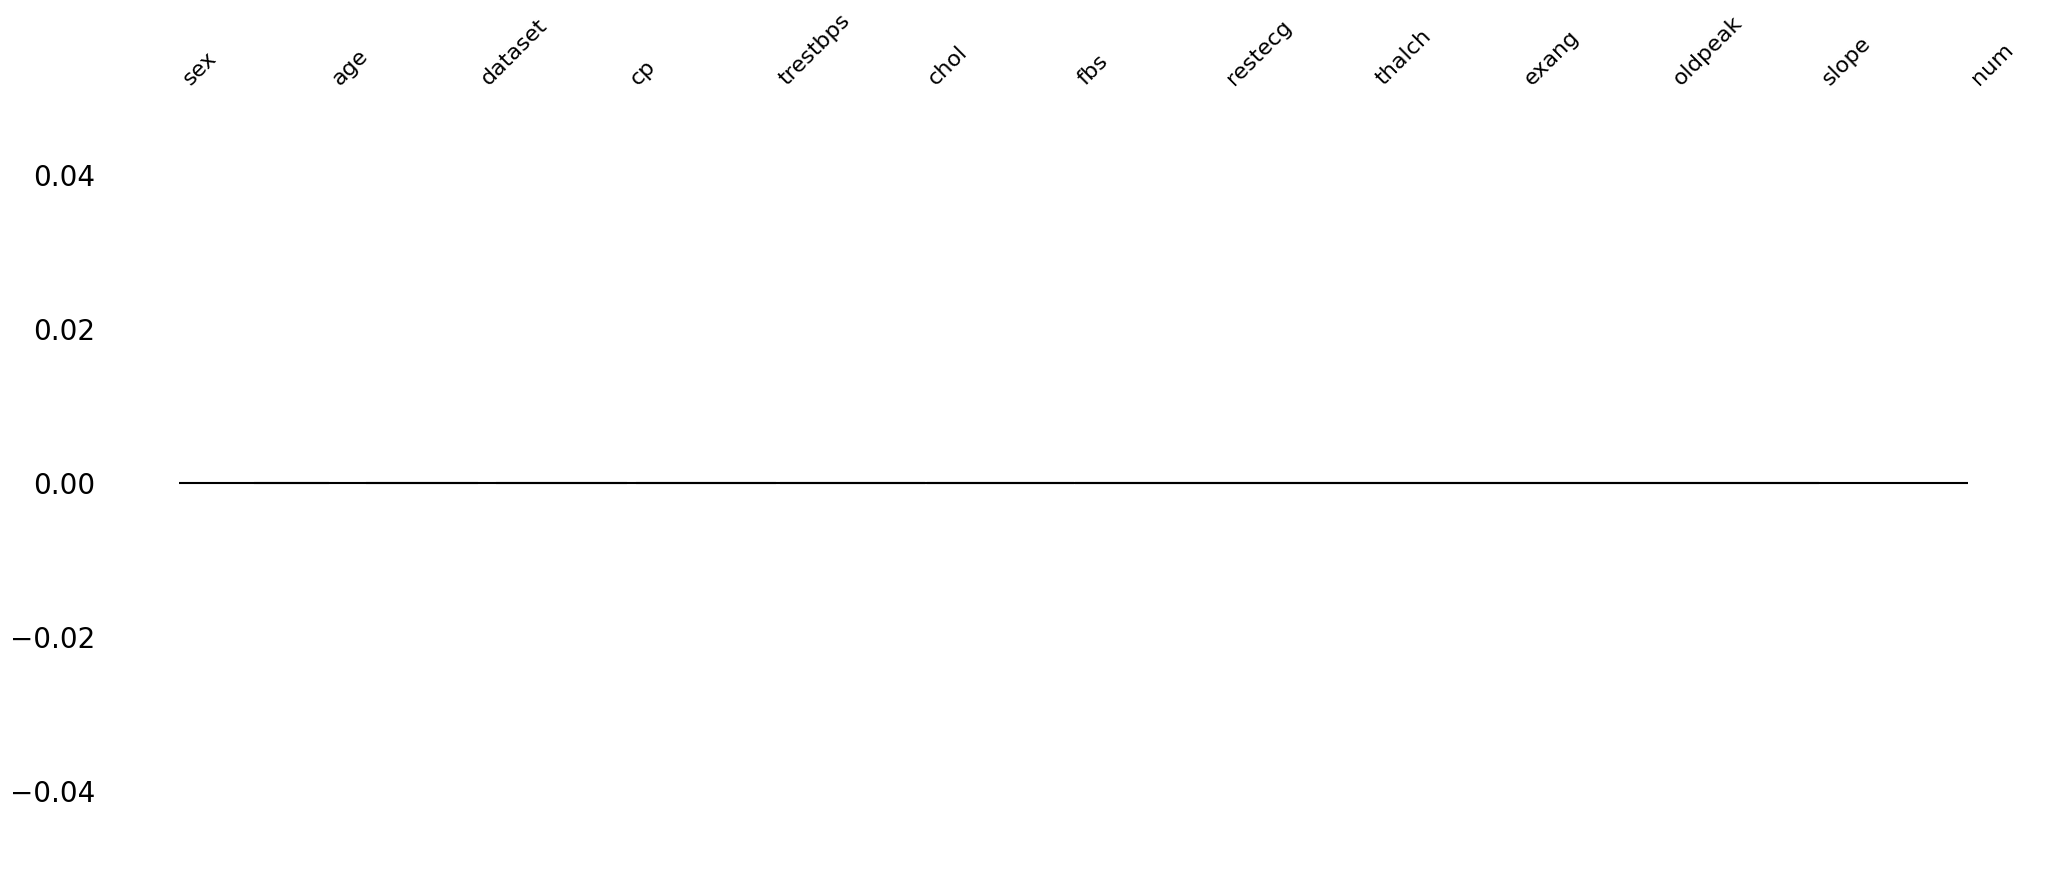

In [31]:
# Another point we can look at in visualization is the dendrogram.
msno.dendrogram(data)

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Import standardization and normalization functions

# Choose either StandardScaler or MinMaxScaler
scaler = StandardScaler()  # This will standardize the data (mean = 0, std = 1)
# scaler = MinMaxScaler()  # Uncomment this line if you want to normalize (scales between 0 and 1)

# Apply the scaler to the pairwise dataset
X_train_pairwise = df_pairwise.dropna()  # Remove rows with missing values for Pairwise
X_train_scaled_pairwise = scaler.fit_transform(X_train_pairwise)  # Standardizing/normalizing the training data

# Optionally, if you want to apply the same transformation to the test set:
# X_test_pairwise = df_test.dropna()  # Remove rows with missing values from test set
# X_test_scaled_pairwise = scaler.transform(X_test_pairwise)  # Transform the test set using the fitted scaler

# After scaling the pairwise dataset, proceed with model training

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming `df_pairwise` is your dataframe after handling missing values
X = df_pairwise.drop(columns=['num'])  # Drop 'num' from features (target variable)
y = df_pairwise['num']  # Target variable

# Split the data into training and test sets
X_train_pairwise, X_test_pairwise, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_pairwise = scaler.fit_transform(X_train_pairwise)  # Standardize training data
X_test_scaled_pairwise = scaler.transform(X_test_pairwise)  # Standardize test data

# Display the first 5 rows of the standardized or normalized data
print("Standardized/Normalized Training Data for Pairwise Method:")
print(pd.DataFrame(X_train_scaled_pairwise, columns=X_train_pairwise.columns).head())

print("\nStandardized/Normalized Test Data for Pairwise Method:")
print(pd.DataFrame(X_test_scaled_pairwise, columns=X_test_pairwise.columns).head())

# If you want to show the mean and standard deviation for verification:
print("\nMean and Standard Deviation of Standardized Data for Pairwise Method:")
print(pd.DataFrame(X_train_scaled_pairwise, columns=X_train_pairwise.columns).mean())  # Mean of training data
print(pd.DataFrame(X_train_scaled_pairwise, columns=X_train_pairwise.columns).std())  # Std Dev of training data

print("\nMean and Standard Deviation of Standardized Test Data for Pairwise Method:")
print(pd.DataFrame(X_test_scaled_pairwise, columns=X_test_pairwise.columns).mean())  # Mean of test data
print(pd.DataFrame(X_test_scaled_pairwise, columns=X_test_pairwise.columns).std())  # Std Dev of test data

Standardized/Normalized Training Data for Pairwise Method:
        age       sex  dataset        cp  trestbps      chol       fbs  \
0  0.135543 -1.539436 -0.16381 -0.896177  3.733824  0.754045  1.938726   
1 -1.747651  0.649589 -0.16381 -0.896177 -0.796624 -0.349807 -0.422297   
2  0.800200  0.649589 -0.16381  0.058193 -0.244130 -0.525783  1.938726   
3  0.135543  0.649589 -0.16381 -0.896177 -0.133632  0.674056  1.938726   
4 -1.304546  0.649589 -0.16381 -0.896177 -1.238619 -0.477790 -0.422297   

    restecg    thalch     exang   oldpeak     slope        ca      thal  
0 -0.986468 -0.684573  1.316561  2.532378 -2.208953  1.450973  0.922778  
1  0.824511 -0.383773 -0.759555  0.138332 -0.633873 -0.718871  0.922778  
2 -0.986468 -0.383773 -0.759555 -0.887688  0.941206 -0.718871 -0.621463  
3 -0.986468 -1.973716  1.316561  0.480339 -2.208953 -0.718871  0.922778  
4  0.824511  0.518627 -0.759555 -0.887688  0.941206 -0.718871  0.922778  

Standardized/Normalized Test Data for Pairwise Meth

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Importing standardization and normalization functions

# Choose either StandardScaler or MinMaxScaler for KNN
scaler = StandardScaler()  # Standardize the data (mean = 0, std = 1)
# scaler = MinMaxScaler()  # Uncomment this if you want to normalize the data to the range [0,1]

# Impute missing values using KNN method (k=5 by default)
X_train_imputed, X_test_imputed, y_train, y_test = knn_impute(X_train, X_test, y_train, y_test, k=5)  # Impute missing values

# Now, let's apply normalization/standardization to the imputed data
X_train_scaled_knn = scaler.fit_transform(X_train_imputed)  # Standardize/normalize the training data
X_test_scaled_knn = scaler.transform(X_test_imputed)  # Apply the same scaling to the test data

# After scaling, you can continue training the model

In [35]:
# Standardization or Normalization for KNN Method

# If you have applied StandardScaler or MinMaxScaler, the transformed data will be stored in X_train_scaled_knn and X_test_scaled_knn
import pandas as pd

# Display the first 5 rows of the standardized or normalized training data
print("Standardized/Normalized Training Data for KNN Method:")
print(pd.DataFrame(X_train_scaled_knn, columns=X_train_imputed.columns).head())  # Display first 5 rows of training data

# Display the first 5 rows of the standardized or normalized test data
print("\nStandardized/Normalized Test Data for KNN Method:")
print(pd.DataFrame(X_test_scaled_knn, columns=X_test_imputed.columns).head())  # Display first 5 rows of test data

# If you want to show the mean and standard deviation for verification:
print("\nMean and Standard Deviation of Standardized Data for KNN Method:")
print(pd.DataFrame(X_train_scaled_knn, columns=X_train_imputed.columns).mean())  # Mean of training data
print(pd.DataFrame(X_train_scaled_knn, columns=X_train_imputed.columns).std())  # Std Dev of training data

Standardized/Normalized Training Data for KNN Method:
        age       sex   dataset        cp  trestbps      chol       fbs  \
0  0.902413  0.505937  1.564762 -0.818287  0.812578 -0.262887 -0.532648   
1  0.034776  0.505937 -0.207030  1.272892  0.948289  0.292006 -0.532648   
2 -0.290587  0.505937  1.564762  1.272892 -0.205607  1.284807 -0.532648   
3 -0.399042 -1.976529 -1.092926  1.272892 -0.642072  0.185853 -0.532648   
4 -0.182133  0.505937 -1.092926  0.227302 -0.642072  1.156595 -0.532648   

    restecg    thalch     exang   oldpeak     slope        ca      thal  
0  1.587084 -0.626070  0.865181  1.971945  1.221804  0.494183  0.830718  
1  0.025461 -0.548731 -0.793083 -0.802794  1.221804 -0.360459  0.830718  
2  0.025461 -0.751746  2.523444 -0.263569  1.221804 -0.123457  0.830718  
3  0.025461  0.843372 -0.793083  0.677067 -0.819621 -1.042737 -1.266738  
4  0.025461  1.384745 -0.793083 -0.617811  0.201091 -1.042737 -1.266738  

Standardized/Normalized Test Data for KNN Method:


In [36]:
# Save the imputed data (after handling missing values)
data_imputed.to_csv('data_imputed.csv', index=False)

In [37]:
# Saving the normalized/standardized data for Pairwise Method
train_scaled_pairwise_df = pd.DataFrame(X_train_scaled_pairwise, columns=X_train_pairwise.columns)
test_scaled_pairwise_df = pd.DataFrame(X_test_scaled_pairwise, columns=X_test_pairwise.columns)

# Save the standardized/normalized training and test data for Pairwise method
train_scaled_pairwise_df.to_csv('X_train_scaled_pairwise.csv', index=False)
test_scaled_pairwise_df.to_csv('X_test_scaled_pairwise.csv', index=False)

# Display confirmation of the saved file
train_scaled_pairwise_df.head(), test_scaled_pairwise_df.head(), data_imputed.head()

(        age       sex  dataset        cp  trestbps      chol       fbs  \
 0  0.135543 -1.539436 -0.16381 -0.896177  3.733824  0.754045  1.938726   
 1 -1.747651  0.649589 -0.16381 -0.896177 -0.796624 -0.349807 -0.422297   
 2  0.800200  0.649589 -0.16381  0.058193 -0.244130 -0.525783  1.938726   
 3  0.135543  0.649589 -0.16381 -0.896177 -0.133632  0.674056  1.938726   
 4 -1.304546  0.649589 -0.16381 -0.896177 -1.238619 -0.477790 -0.422297   
 
     restecg    thalch     exang   oldpeak     slope        ca      thal  
 0 -0.986468 -0.684573  1.316561  2.532378 -2.208953  1.450973  0.922778  
 1  0.824511 -0.383773 -0.759555  0.138332 -0.633873 -0.718871  0.922778  
 2 -0.986468 -0.383773 -0.759555 -0.887688  0.941206 -0.718871 -0.621463  
 3 -0.986468 -1.973716  1.316561  0.480339 -2.208953 -0.718871  0.922778  
 4  0.824511  0.518627 -0.759555 -0.887688  0.941206 -0.718871  0.922778  ,
         age       sex  dataset        cp  trestbps      chol       fbs  \
 0  0.024767 -1.539436

In [38]:
# Save the standardized/normalized training and test data for KNN
train_scaled_df = pd.DataFrame(X_train_scaled_knn, columns=X_train_imputed.columns)
test_scaled_df = pd.DataFrame(X_test_scaled_knn, columns=X_test_imputed.columns)

train_scaled_df.to_csv('X_train_scaled_knn.csv', index=False)
test_scaled_df.to_csv('X_test_scaled_knn.csv', index=False)

# Show confirmation of saved files
train_scaled_df.head(), test_scaled_df.head(), data_imputed.head()

(        age       sex   dataset        cp  trestbps      chol       fbs  \
 0  0.902413  0.505937  1.564762 -0.818287  0.812578 -0.262887 -0.532648   
 1  0.034776  0.505937 -0.207030  1.272892  0.948289  0.292006 -0.532648   
 2 -0.290587  0.505937  1.564762  1.272892 -0.205607  1.284807 -0.532648   
 3 -0.399042 -1.976529 -1.092926  1.272892 -0.642072  0.185853 -0.532648   
 4 -0.182133  0.505937 -1.092926  0.227302 -0.642072  1.156595 -0.532648   
 
     restecg    thalch     exang   oldpeak     slope        ca      thal  
 0  1.587084 -0.626070  0.865181  1.971945  1.221804  0.494183  0.830718  
 1  0.025461 -0.548731 -0.793083 -0.802794  1.221804 -0.360459  0.830718  
 2  0.025461 -0.751746  2.523444 -0.263569  1.221804 -0.123457  0.830718  
 3  0.025461  0.843372 -0.793083  0.677067 -0.819621 -1.042737 -1.266738  
 4  0.025461  1.384745 -0.793083 -0.617811  0.201091 -1.042737 -1.266738  ,
         age       sex   dataset        cp  trestbps      chol       fbs  \
 0 -1.917406  0

In [39]:
print(data)

     age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0     63    1        0   3     145.0  233.0    1        0   150.0      0   
1     67    1        0   0     160.0  286.0    0        0   108.0      1   
2     67    1        0   0     120.0  229.0    0        0   129.0      1   
3     37    1        0   2     130.0  250.0    0        1   187.0      0   
4     41    0        0   1     130.0  204.0    0        0   172.0      0   
..   ...  ...      ...  ..       ...    ...  ...      ...     ...    ...   
915   54    0        3   0     127.0  333.0    1        2   154.0      0   
916   62    1        3   3     130.0  139.0    0        2   140.0      2   
917   55    1        3   0     122.0  223.0    1        2   100.0      0   
918   58    1        3   0     130.0  385.0    1        0   140.0      2   
919   62    1        3   1     120.0  254.0    0        0    93.0      1   

     oldpeak  slope  num  
0        2.3      0    0  
1        1.5      1    1  
2     

In [40]:
print(data.head())

   age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope  num  
0      2.3      0    0  
1      1.5      1    1  
2      2.6      1    1  
3      3.5      0    0  
4      1.4      2    0  


In [41]:
print(data.columns)

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')


In [42]:
# 1. Summary Statistics
summary_stats = data.describe()  # Basic stats: mean, std, min, max
summary_stats

# Filter the data to only include numeric columns
numeric_data = data.select_dtypes(include=['number'])
numeric_data

# Compute median and variance for only numeric columns
median_values = numeric_data.median()  # Median for each numeric column
median_values
variance_values = numeric_data.var()  # Variance for each numeric column
variance_values

,0
age,88.824691
sex,0.166585
dataset,1.278421
cp,0.914605
trestbps,340.450471
chol,11889.758793
fbs,0.422288
restecg,0.408023
thalch,632.282858
exang,0.369767


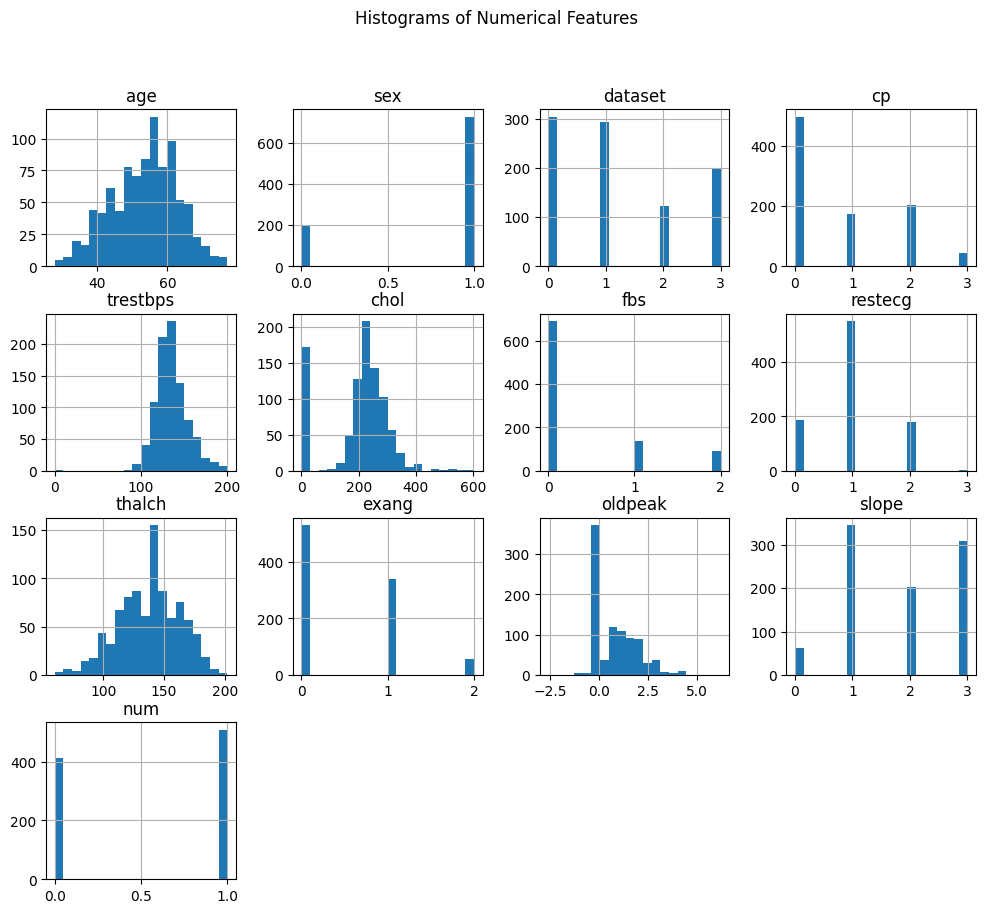

In [43]:
# 2. Visualization
# Histograms
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

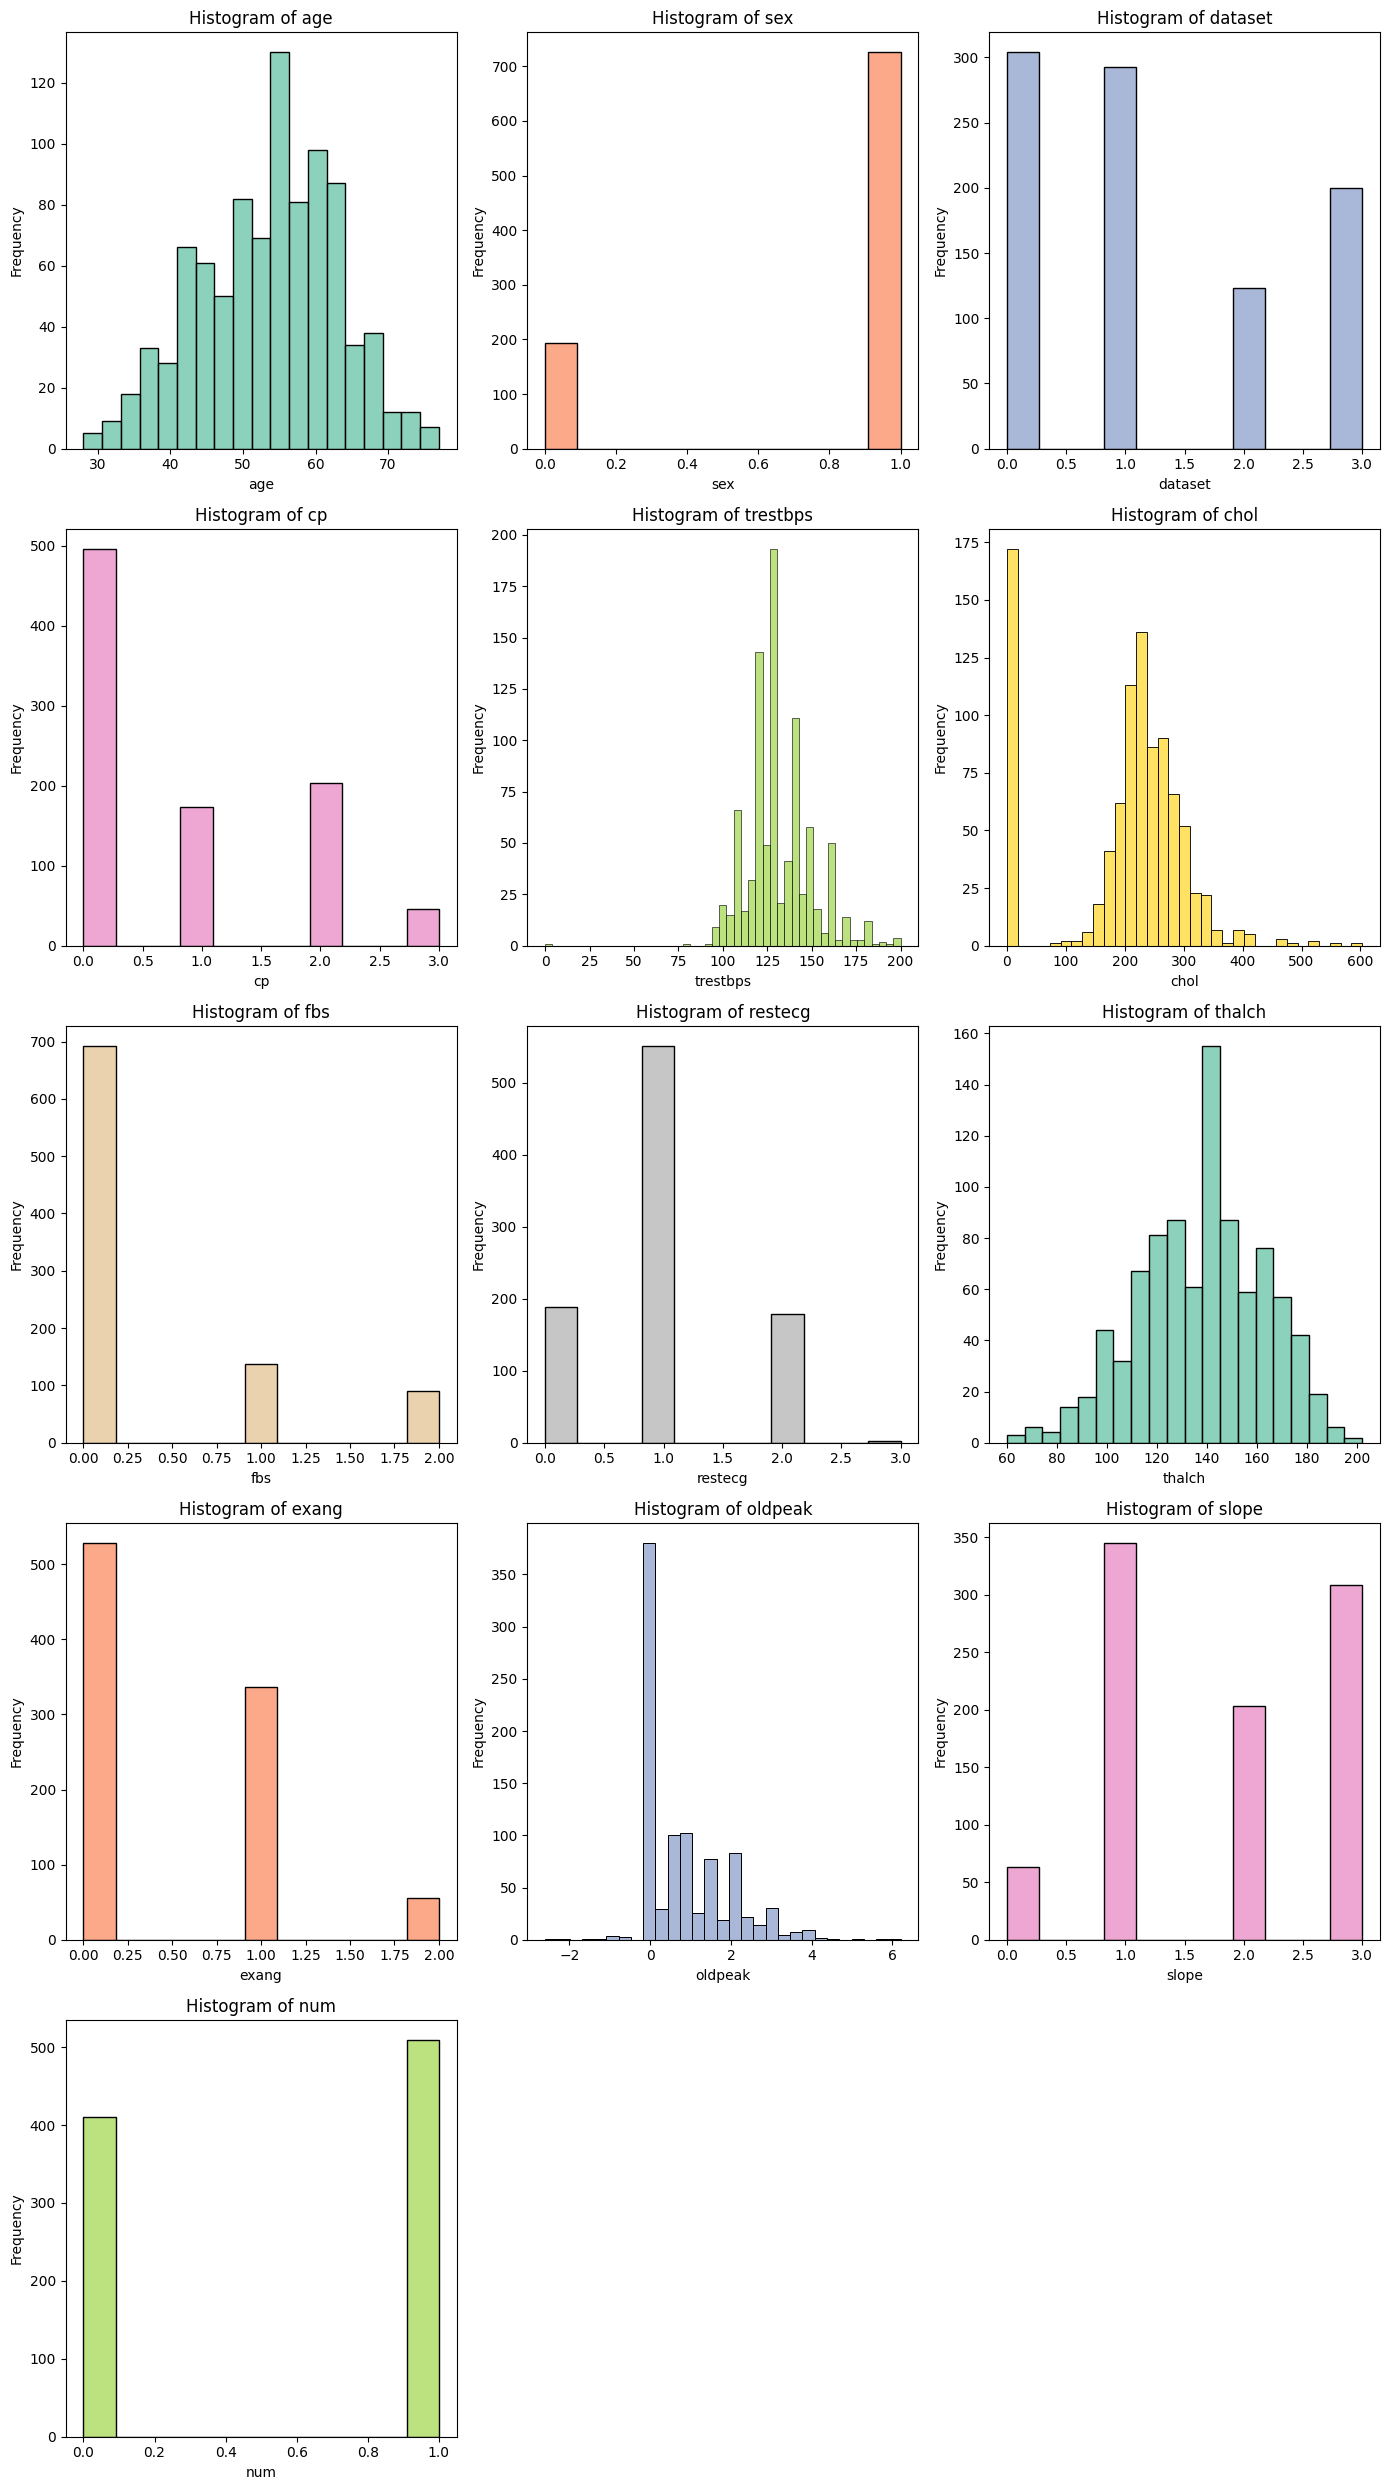

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set a color palette for each feature
colors = sns.color_palette("Set2", n_colors=len(data.columns))

# Create histograms with different colors for each feature
num_features = len(data.select_dtypes(include=['number']).columns)
n_cols = 3  # Number of columns in the subplot grid
n_rows = math.ceil(num_features / n_cols)  # Calculate number of rows needed

plt.figure(figsize=(14, 5 * n_rows))  # Adjust the figure size dynamically

for i, feature in enumerate(data.select_dtypes(include=['number']).columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[feature], kde=False, color=colors[i])
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

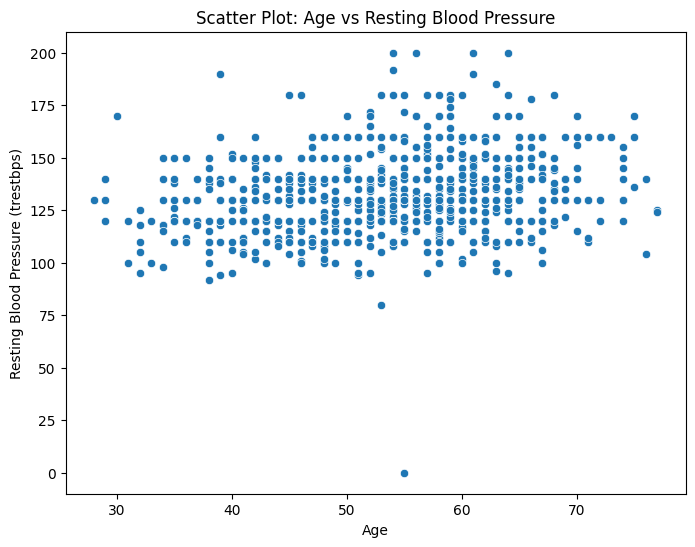

In [45]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['trestbps'])
plt.title('Scatter Plot: Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

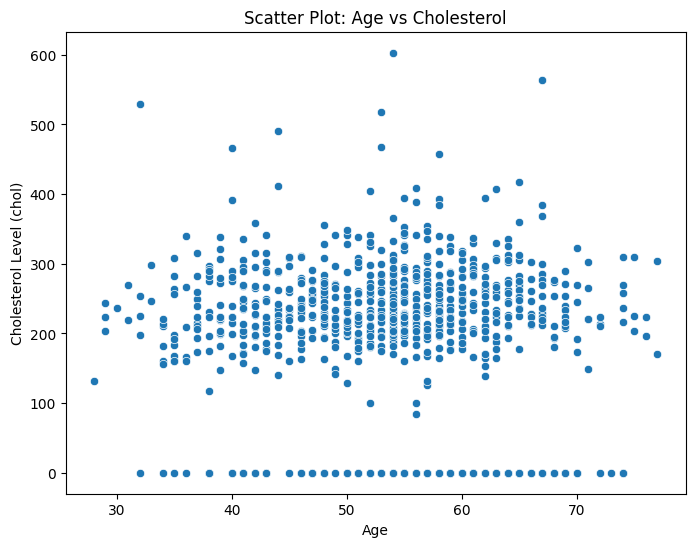

In [46]:
# Scatter Plot: Age vs Cholesterol (chol)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['chol'])
plt.title('Scatter Plot: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level (chol)')
plt.show()

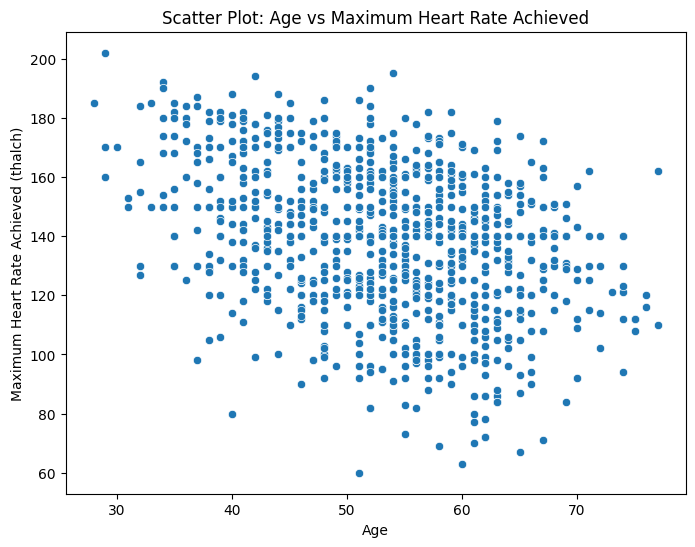

In [47]:
# Scatter Plot: Age vs Maximum Heart Rate Achieved (thalch)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['thalch'])
plt.title('Scatter Plot: Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalch)')
plt.show()

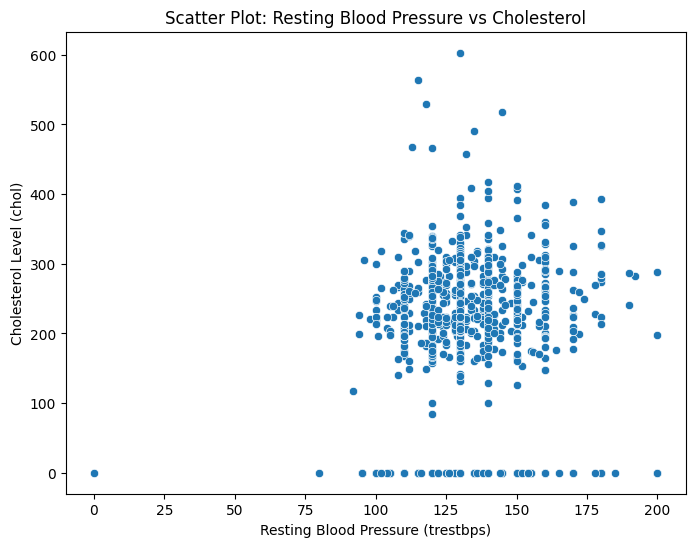

In [48]:
# Scatter Plot: Resting Blood Pressure vs Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['trestbps'], y=data['chol'])
plt.title('Scatter Plot: Resting Blood Pressure vs Cholesterol')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Cholesterol Level (chol)')
plt.show()

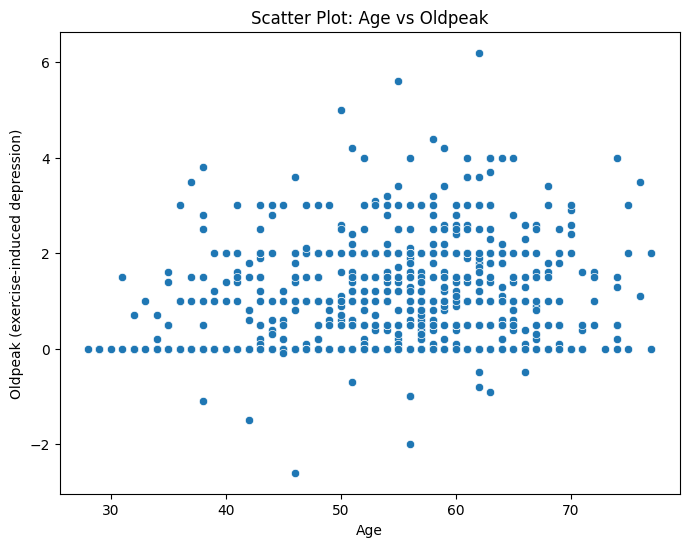

In [49]:
# Scatter Plot: Age vs Oldpeak (depression induced by exercise)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['oldpeak'])
plt.title('Scatter Plot: Age vs Oldpeak')
plt.xlabel('Age')
plt.ylabel('Oldpeak (exercise-induced depression)')
plt.show()

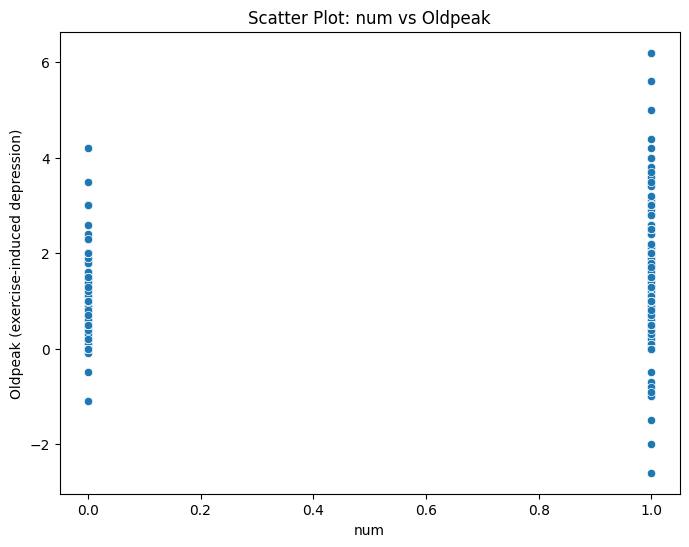

In [50]:
# Scatter Plot: num vs oldpeak
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['num'], y=data['oldpeak'])
plt.title('Scatter Plot: num vs Oldpeak')
plt.xlabel('num')
plt.ylabel('Oldpeak (exercise-induced depression)')
plt.show()

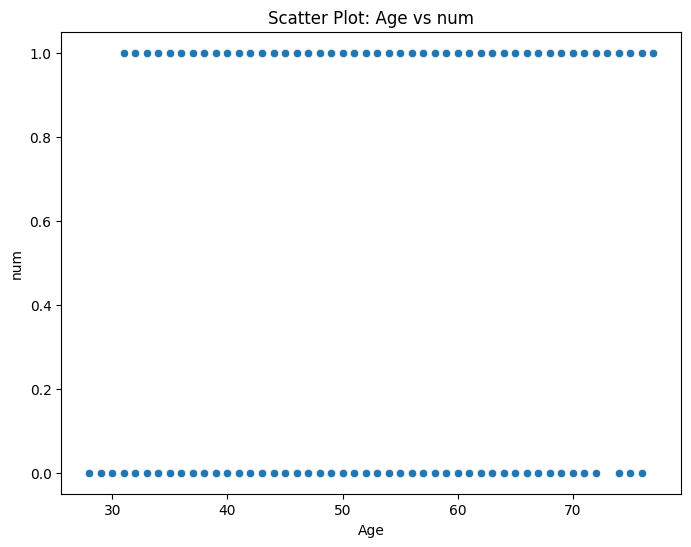

In [51]:
# Scatter Plot: age vs num
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['num'])
plt.title('Scatter Plot: Age vs num')
plt.xlabel('Age')
plt.ylabel('num')
plt.show()

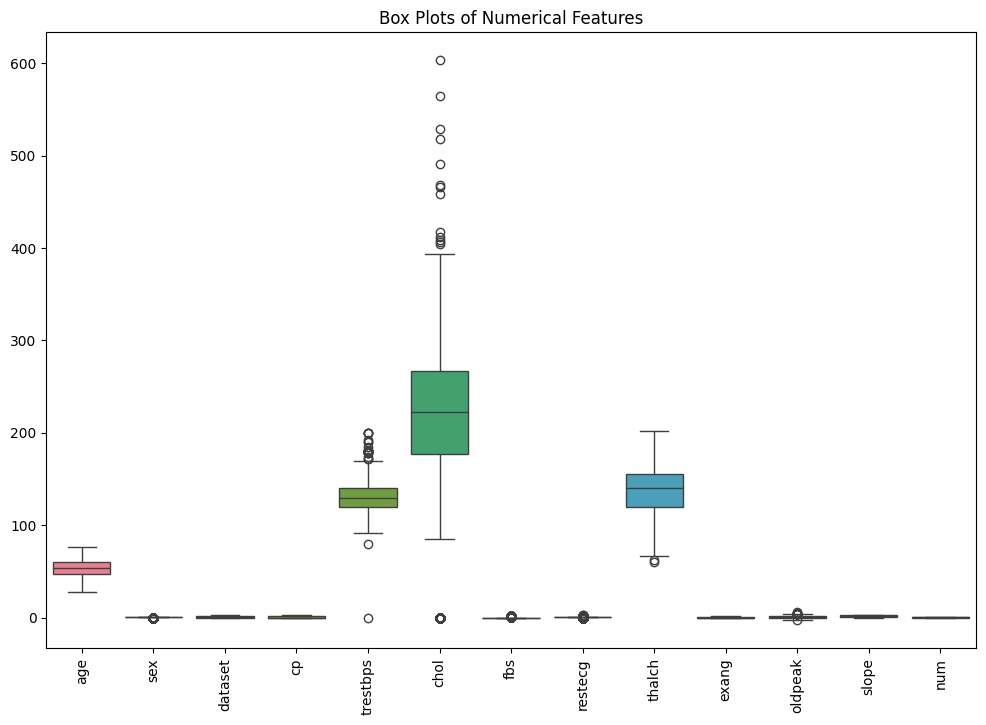

In [52]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

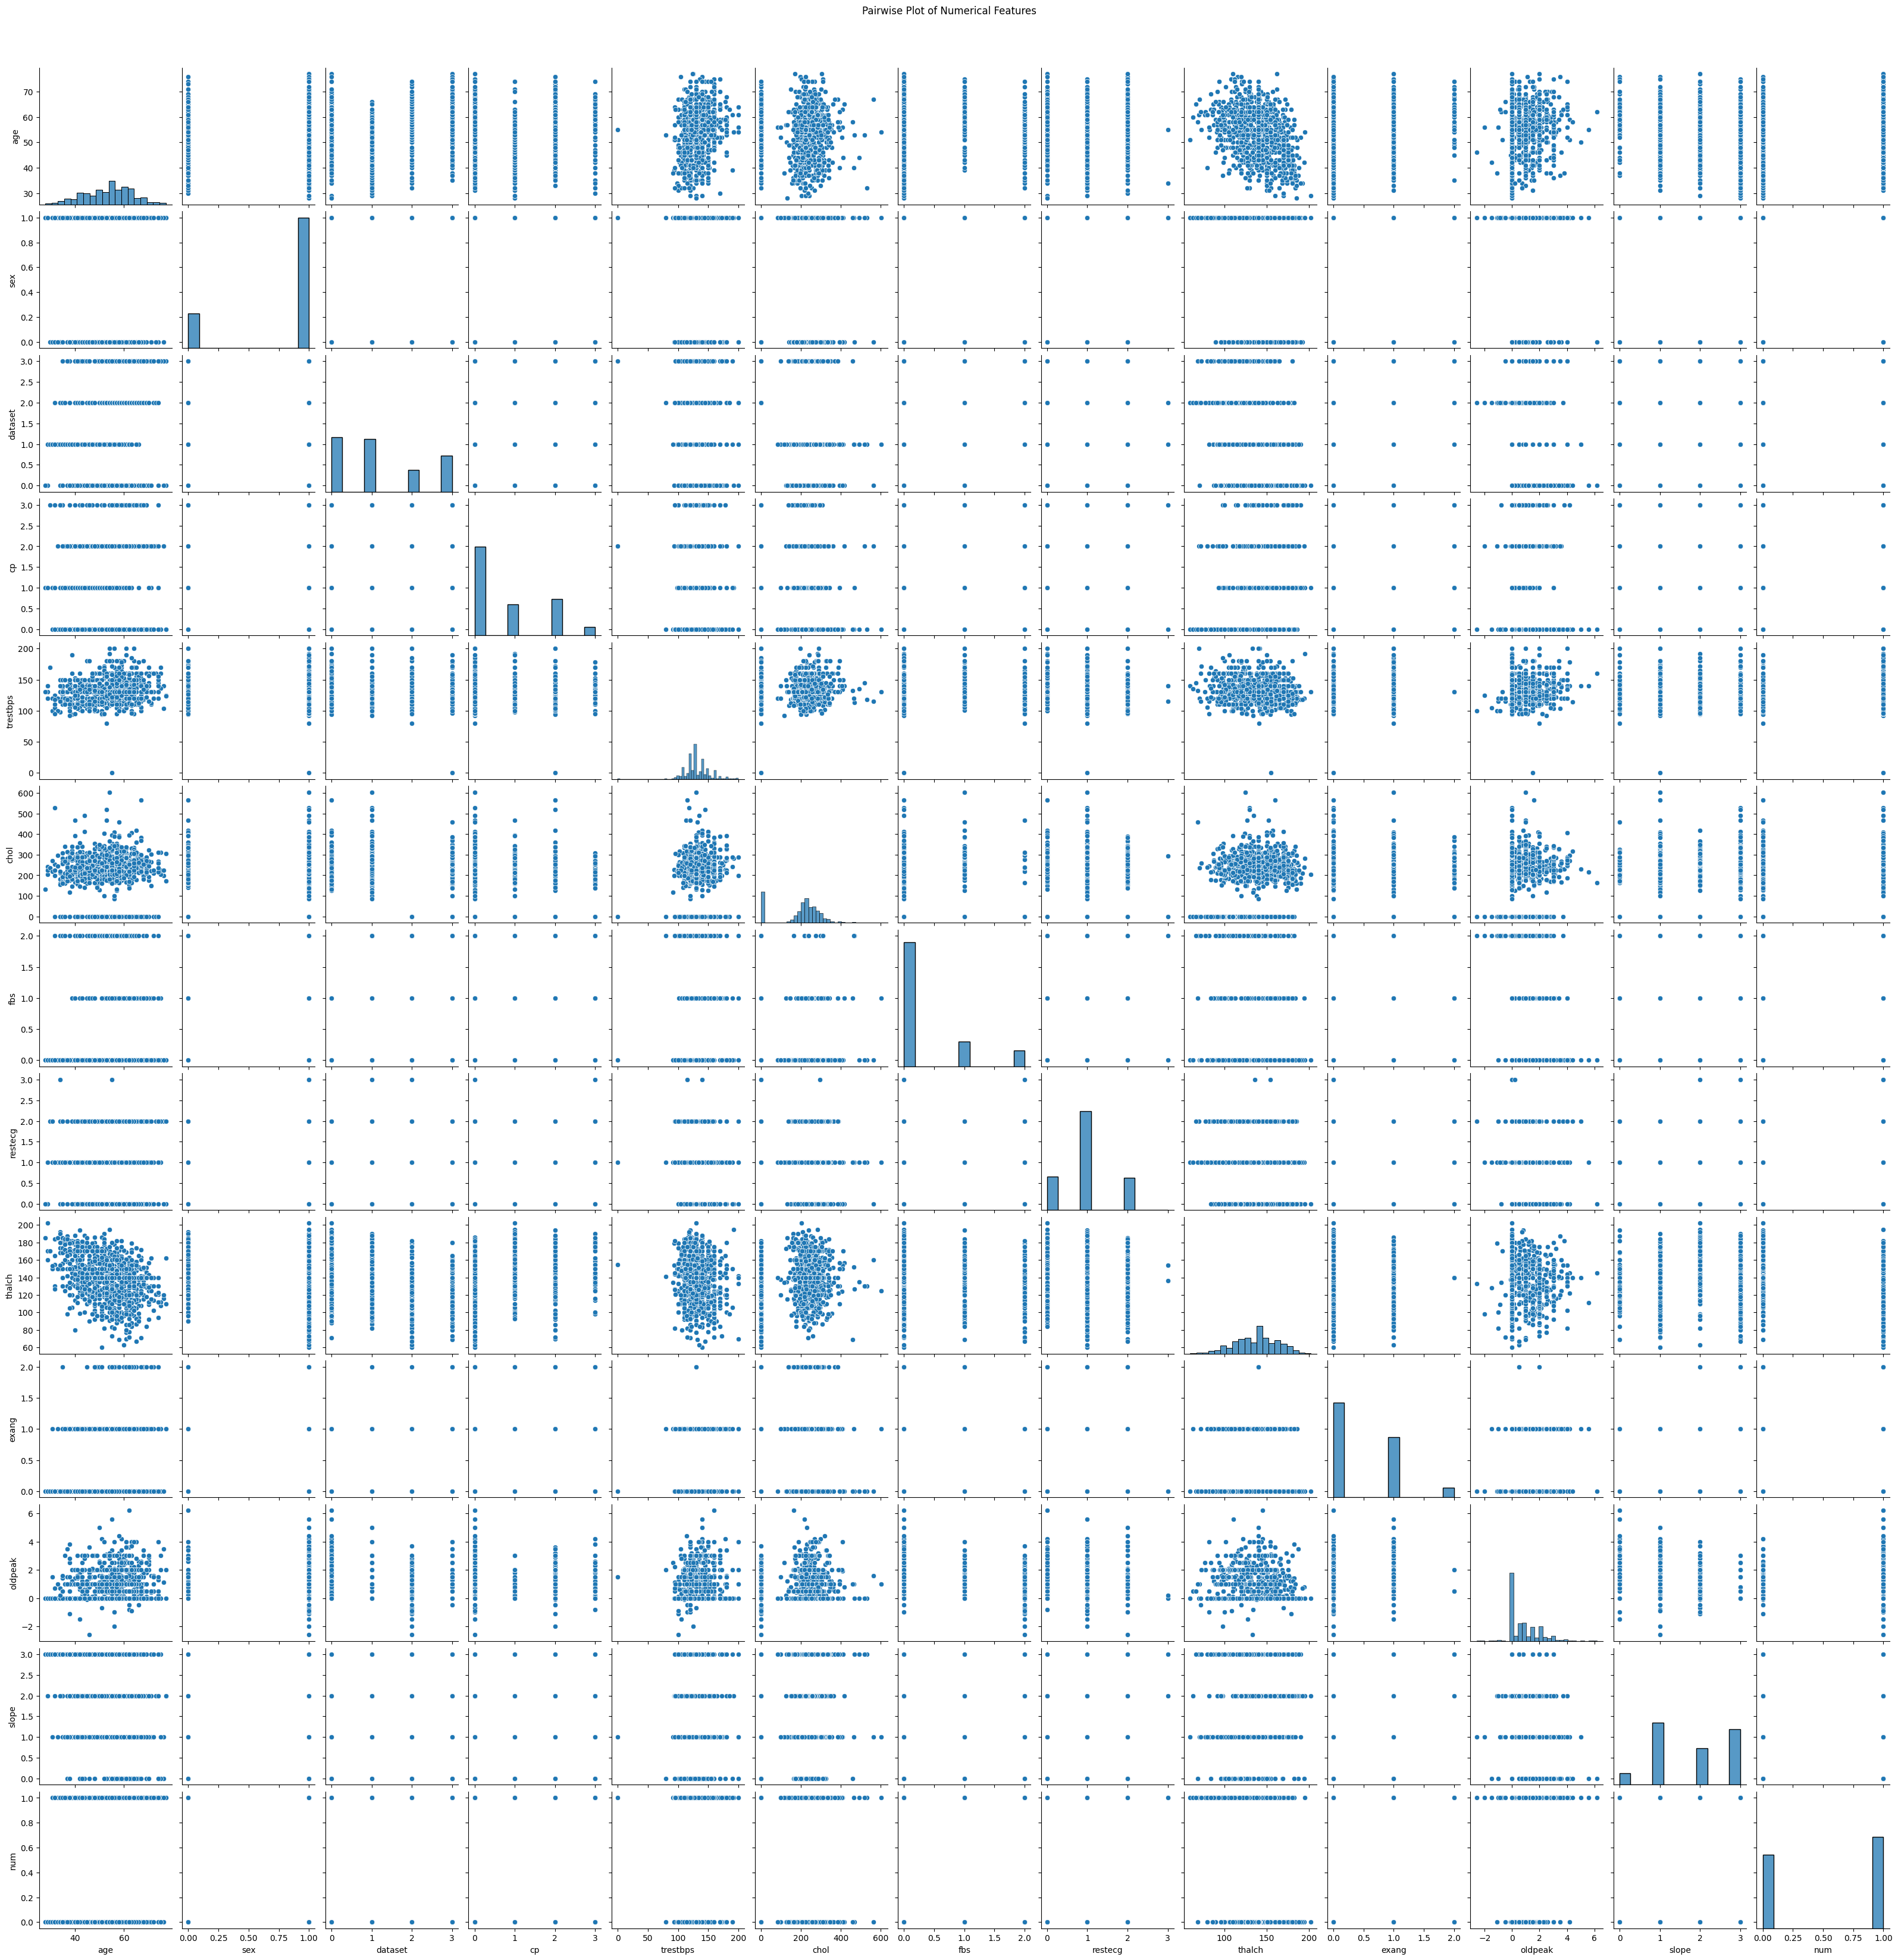

In [53]:
import seaborn as sns

# Pair plot of numerical features
sns.pairplot(data.select_dtypes(include=['number']))
plt.suptitle('Pairwise Plot of Numerical Features', y=1.02)
plt.show()

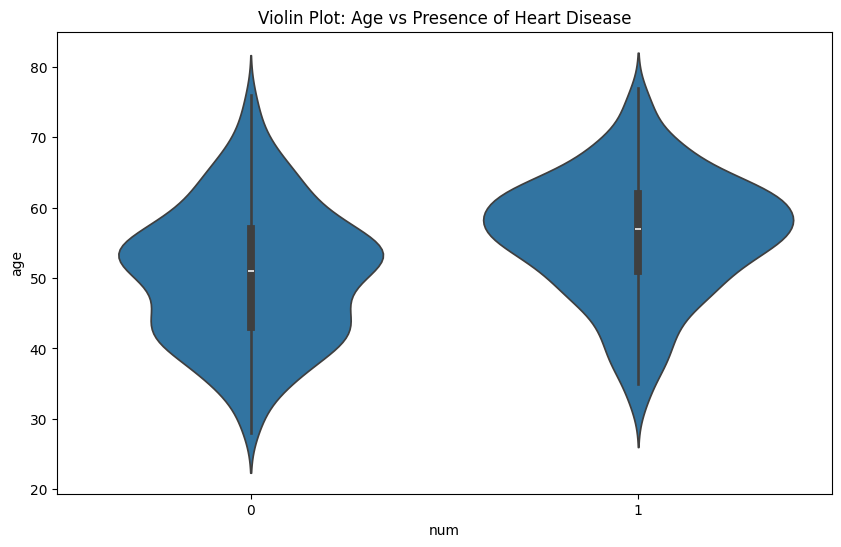

In [54]:
# Violin plot to compare distributions of features based on the target variable 'num'
plt.figure(figsize=(10, 6))
sns.violinplot(x='num', y='age', data=data)
plt.title('Violin Plot: Age vs Presence of Heart Disease')
plt.show()

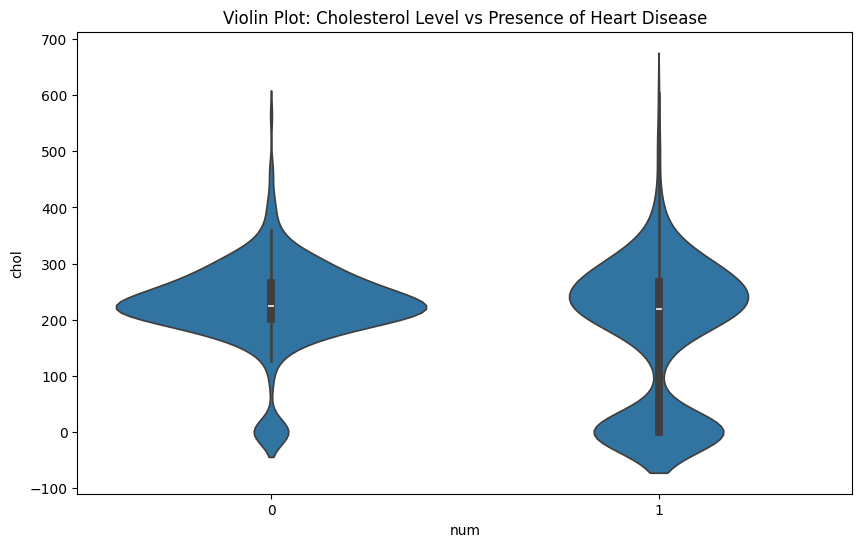

In [55]:
# Violin plot for another feature
plt.figure(figsize=(10, 6))
sns.violinplot(x='num', y='chol', data=data)
plt.title('Violin Plot: Cholesterol Level vs Presence of Heart Disease')
plt.show()

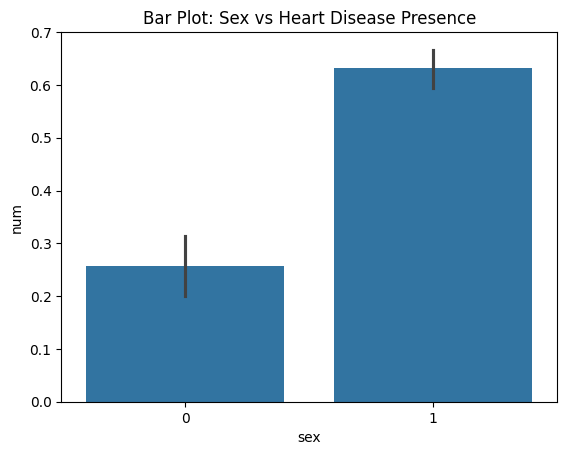

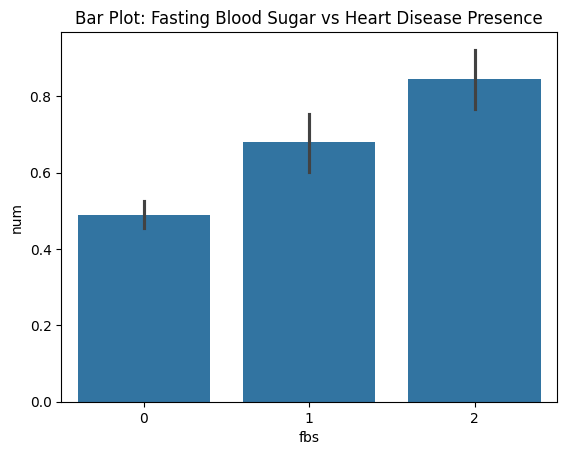

In [56]:
# Bar plot of gender vs heart disease presence
sns.barplot(x='sex', y='num', data=data)
plt.title('Bar Plot: Sex vs Heart Disease Presence')
plt.show()

# Bar plot of fasting blood sugar vs heart disease presence
sns.barplot(x='fbs', y='num', data=data)
plt.title('Bar Plot: Fasting Blood Sugar vs Heart Disease Presence')
plt.show()

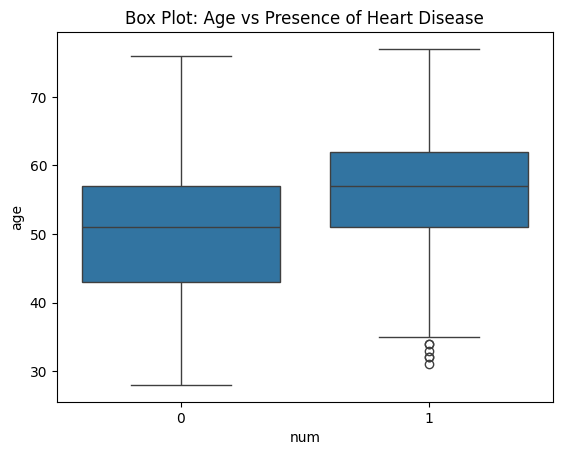

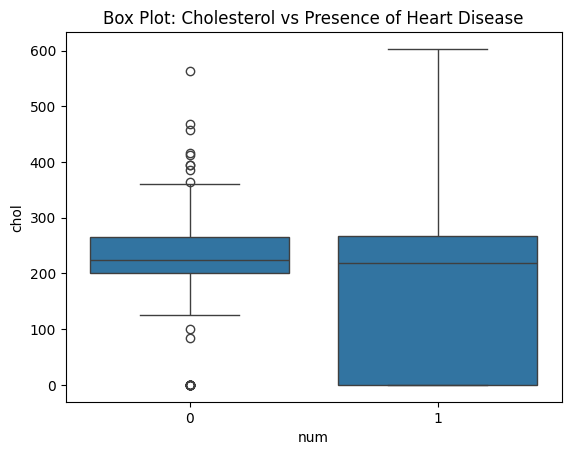

In [57]:
# Box plot for Age vs Presence of Heart Disease
sns.boxplot(x='num', y='age', data=data)
plt.title('Box Plot: Age vs Presence of Heart Disease')
plt.show()

# Box plot for Cholesterol vs Presence of Heart Disease
sns.boxplot(x='num', y='chol', data=data)
plt.title('Box Plot: Cholesterol vs Presence of Heart Disease')
plt.show()

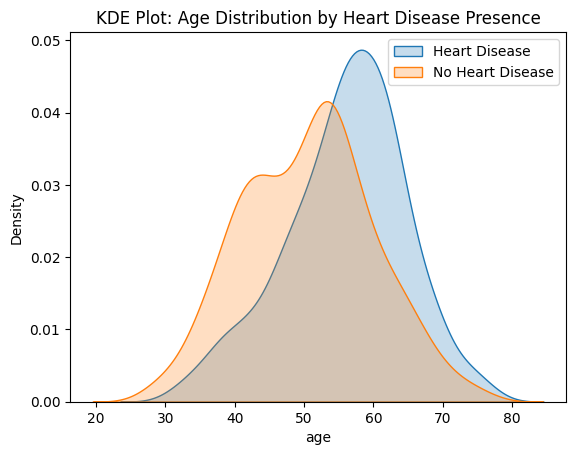

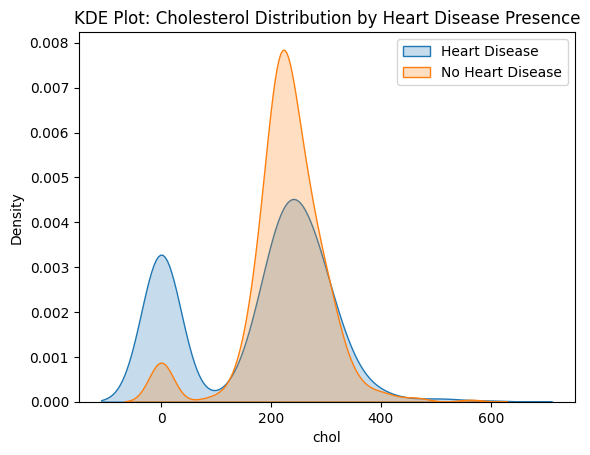

In [58]:
# KDE plot for Age distribution by Heart Disease presence
sns.kdeplot(data=data[data['num'] == 1]['age'], label="Heart Disease", fill=True)
sns.kdeplot(data=data[data['num'] == 0]['age'], label="No Heart Disease", fill=True)
plt.title('KDE Plot: Age Distribution by Heart Disease Presence')
plt.legend()
plt.show()

# KDE plot for Cholesterol distribution by Heart Disease presence
sns.kdeplot(data=data[data['num'] == 1]['chol'], label="Heart Disease", fill=True)
sns.kdeplot(data=data[data['num'] == 0]['chol'], label="No Heart Disease", fill=True)
plt.title('KDE Plot: Cholesterol Distribution by Heart Disease Presence')
plt.legend()
plt.show()

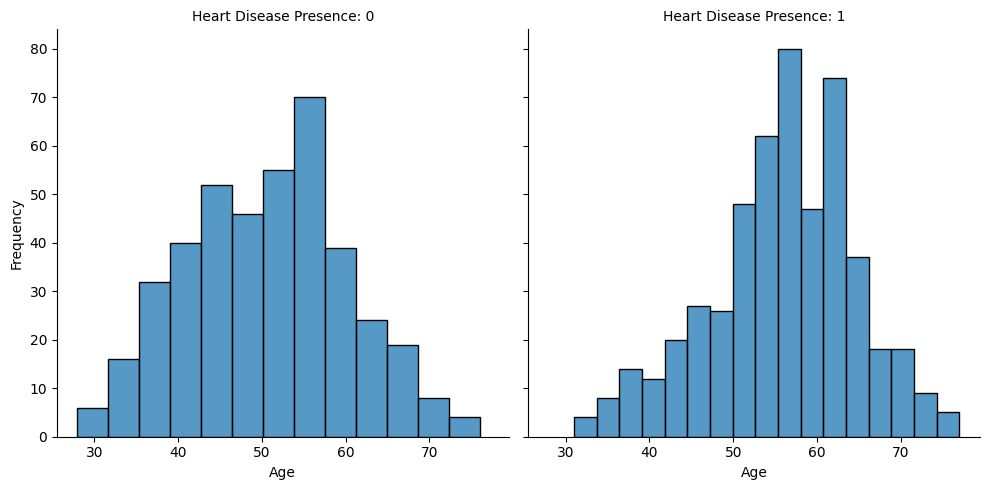

In [59]:
# Facet grid for comparing distributions of features by the target variable 'num'
g = sns.FacetGrid(data, col="num", height=5)
g.map(sns.histplot, 'age')
g.set_axis_labels('Age', 'Frequency')
g.set_titles("Heart Disease Presence: {col_name}")
plt.show()

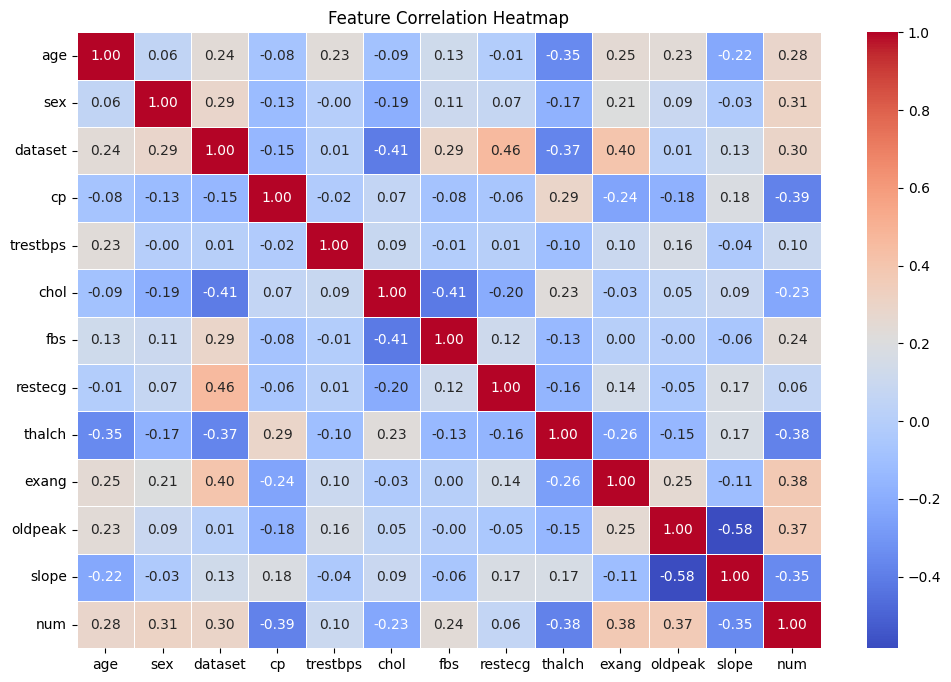

In [60]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Heatmap for correlations with better visual adjustments
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

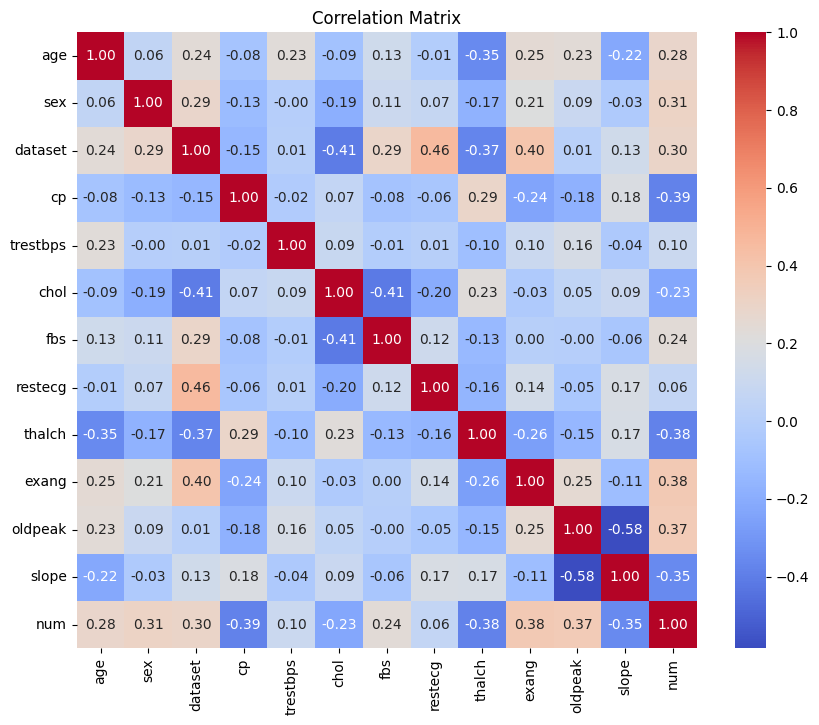

In [61]:
# Select only the numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Enhanced EDA Insights Report

insights = {
    "Summary Statistics": summary_stats,
    "Median Values": median_values,
    "Variance Values": variance_values,
    "Correlation Insights": correlation_matrix,
    "Key Trends and Visual Insights": {
        "Age Distribution": "The majority of individuals in the dataset are middle-aged, with most ages falling between 40 and 60 years. This is typical for heart disease datasets, as the risk of heart disease increases with age.",
        "Resting Blood Pressure (trestbps)": "Resting blood pressure is mostly clustered between 120 and 140 mm Hg, which is within the normal range. However, some outliers with extreme values exist, particularly on the higher end, indicating individuals with potentially high blood pressure.",
        "Cholesterol Levels (chol)": "Cholesterol levels are right-skewed, with most individuals having cholesterol levels between 150 and 300 mg/dL. However, there are a few extreme outliers, with some individuals having very high cholesterol levels (above 300 mg/dL).",
        "Heart Rate (thalch)": "The majority of individuals in the dataset achieved a maximum heart rate between 120 and 180 bpm. This suggests a generally healthy heart rate for most individuals, with only a few extreme values indicating higher heart rate levels during exercise.",
        "Exercise-induced Depression (oldpeak)": "The exercise-induced depression variable (oldpeak) is heavily concentrated around 0, indicating that most individuals experience little to no depression during exercise. However, a small number of individuals show higher levels of depression during exercise, indicating more severe cases.",
        "Vessel Involvement (ca)": "Most individuals have either 0 or 1 affected vessels, with very few cases where multiple vessels are affected. This indicates that most individuals have relatively mild heart disease, with a few having more severe cases.",
        "Heart Disease Presence (num)": "The target variable (num) shows a skewed distribution, with most individuals having a relatively mild presence of heart disease (0 or 1), while fewer individuals have more severe cases (2, 3, or 4)."
    },
    "Scatter Plot Insights": {
        "Age vs Cholesterol (chol)": "The scatter plot suggests that there is no clear correlation between age and cholesterol levels, with a wide spread across all age groups.",
        "Age vs Maximum Heart Rate Achieved (thalch)": "There is a negative correlation between age and maximum heart rate achieved, where older individuals tend to achieve lower heart rates during exercise, likely due to decreased fitness levels with age.",
        "Resting Blood Pressure vs Cholesterol (trestbps vs chol)": "There is no significant linear relationship between resting blood pressure and cholesterol levels, indicating that these two variables may not be directly related in this dataset."
    },
    "Correlation Matrix Insights": {
        "Strongest Correlations": "The strongest correlations were observed between 'ca' (number of affected vessels) and 'num' (presence of heart disease), with a moderate positive correlation of 0.52, indicating that more affected vessels are associated with a higher likelihood of heart disease.",
        "Moderate Correlations": "There are moderate correlations between 'num' and 'oldpeak' (0.44), suggesting that higher levels of depression during exercise are associated with a higher likelihood of heart disease. Similarly, 'num' and 'age' also have a positive correlation of 0.34, indicating that older individuals are more likely to have heart disease.",
        "Negative Correlations": "'thalch' (maximum heart rate) has a negative correlation with 'num' (-0.37), indicating that individuals with a higher heart rate during exercise are less likely to have heart disease. Additionally, 'thalch' is negatively correlated with both 'age' and 'trestbps', indicating a potential inverse relationship with age and blood pressure."
    },
}

# Print the Enhanced EDA Report Summary
print("EDA Report Summary:")
print("\n1. Summary Statistics (mean, std, min, etc.):")
print(summary_stats)

print("\n2. Median Values:")
print(median_values)

print("\n3. Variance Values:")
print(variance_values)

print("\n4. Correlation Insights:")
print(correlation_matrix)

print("\n5. Key Trends and Visual Insights:")
for key, value in insights["Key Trends and Visual Insights"].items():
    print(f"{key}: {value}")

print("\n6. Scatter Plot Insights:")
for key, value in insights["Scatter Plot Insights"].items():
    print(f"{key}: {value}")

print("\n7. Correlation Matrix Insights:")
for key, value in insights["Correlation Matrix Insights"].items():
    print(f"{key}: {value}")

EDA Report Summary:

1. Summary Statistics (mean, std, min, etc.):
              age         sex     dataset          cp    trestbps        chol  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870    0.789130    1.238043    0.782609  131.995652  199.908696   
std      9.424685    0.408148    1.130673    0.956350   18.451300  109.040171   
min     28.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     47.000000    1.000000    0.000000    0.000000  120.000000  177.750000   
50%     54.000000    1.000000    1.000000    0.000000  130.000000  223.000000   
75%     60.000000    1.000000    2.000000    2.000000  140.000000  267.000000   
max     77.000000    1.000000    3.000000    3.000000  200.000000  603.000000   

              fbs     restecg      thalch       exang     oldpeak       slope  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean     0.345652    0.994565  137.692391